Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Loading the dataset

In [2]:
df=pd.read_csv("Delivery Time Data.csv")

In [3]:
df.head()

market_id           created_at actual_delivery_time  store_id  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  
0                                         861.0  
1                                         690.0  
2                                         690.0  
3                                         289.0  
4                                         650.0

In [4]:
df.shape

(197428, 16)

In [5]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

# Univariate Analysis & Bivariate Analysis

In [512]:
df.describe()

market_id       store_id  order_protocol    total_items  \
count  196441.000000  197428.000000   196433.000000  197428.000000   
mean        2.978706    3530.510272        2.882352       3.196391   
std         1.524867    2053.496711        1.503771       2.666546   
min         1.000000       1.000000        1.000000       1.000000   
25%         2.000000    1686.000000        1.000000       2.000000   
50%         3.000000    3592.000000        3.000000       3.000000   
75%         4.000000    5299.000000        4.000000       4.000000   
max         6.000000    6987.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  197428.000000       197428.000000   197428.000000   197428.000000   
mean     2682.331402            2.670791      686.218470     1159.588630   
std      1823.093688            1.630255      522.038648      558.411377   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1400.000000            1.000000      299.000000      800.000000   
50%      2200.000000            2.000000      595.000000     1095.000000   
75%      3395.000000            3.000000      949.000000     1395.000000   
max     27100.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          181166.000000       181166.000000             181166.000000   
mean               44.808093           41.739747                 58.050065   
std                34.526783           32.145733                 52.661830   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           34.000000                 41.000000   
75%                65.000000           62.000000                 85.000000   
max               171.000000          154.000000                285.000000   

       estimated_order_place_duration  \
count                   197428.000000   
mean                       308.560179   
std                         90.139653   
min                          0.000000   
25%                        251.000000   
50%                        251.000000   
75%                        446.000000   
max                       2715.000000   

       estimated_store_to_consumer_driving_duration  
count                                 196902.000000  
mean                                     545.358935  
std                                      219.352902  
min                                        0.000000  
25%                                      382.000000  
50%                                      544.000000  
75%                                      702.000000  
max                                     2088.000000

In [513]:
df['market_id'].value_counts()

2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: market_id, dtype: int64

In [514]:
df['market_id'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.])

From the above we can identify doordash orders are from 6 different regions of USA and for few of the recordrs market_id is missing

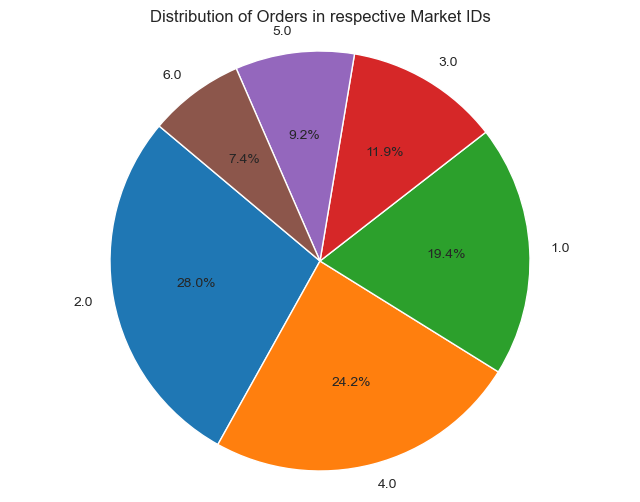

In [515]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Set seaborn style
plt.pie(df['market_id'].value_counts(), labels=df['market_id'].value_counts().index,
        autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Orders in respective Market IDs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## from above market id 2,4 and 1 are major markets where we got most number of orders

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

 "created_at" and "actual_delivery_time" both columns are of object datatype so converting them into date time format

In [7]:
df['created_at']=df['created_at'].astype("datetime64")
df['actual_delivery_time']=df['actual_delivery_time'].astype("datetime64")

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [519]:
df['created_at'].describe()

C:\Users\Mansoor\AppData\Local\Temp\ipykernel_23344\961238206.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['created_at'].describe()


count                  197428
unique                 180985
top       2015-02-11 19:50:43
freq                        6
first     2014-10-19 05:24:15
last      2015-02-18 06:00:44
Name: created_at, dtype: object

In [521]:
print(df['created_at'].min())
print(df['created_at'].max())
diff=(df['created_at'].max()-df['created_at'].min()).days
print(f'we have data of around {diff/30} months or {diff} days' )

2014-10-19 05:24:15
2015-02-18 06:00:44
we have data of around 4.066666666666666 months or 122 days


##  We have around 4 months of data 

In [522]:
n_res=len(df['store_id'].unique())
print(f"orders on doordash were placed for {n_res} number of restaurants")

orders on doordash were placed for 6743 number of restaurants


In [523]:
df['order_protocol'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [524]:
n_ty_or=len(df['order_protocol'].unique())
print(f'there are {n_ty_or-1} different modes or ways that doordash gets the orders')
# n-1 is done for the above calcutation bcz for some records there is no order_protocol i.e, nan
# so here for understanding purpose we have neglected that nan

there are 7 different modes or ways that doordash gets the orders


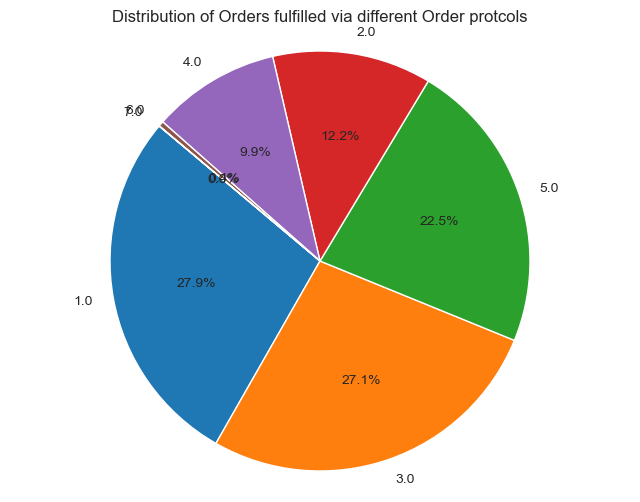

In [525]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")  # Set seaborn style
plt.pie(df['order_protocol'].value_counts(), labels=df['order_protocol'].value_counts().index,
        autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Orders fulfilled via different Order protcols')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## from above order protocol 1,3 and followed by 5 are the top modes of receiving the order

In [526]:
df.head()

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  
0                                         861.0  
1                                         690.0  
2                                         690.0  
3                                         289.0  
4                                         650.0

In [527]:
store_count_per_market=df.groupby('market_id')['store_id'].nunique().reset_index()
store_count_per_market.columns = ['Market ID', 'Store Count']

In [528]:
print(store_count_per_market)

   Market ID  Store Count
0        1.0         2925
1        2.0         1939
2        3.0         2564
3        4.0         1818
4        5.0         1408
5        6.0         1310


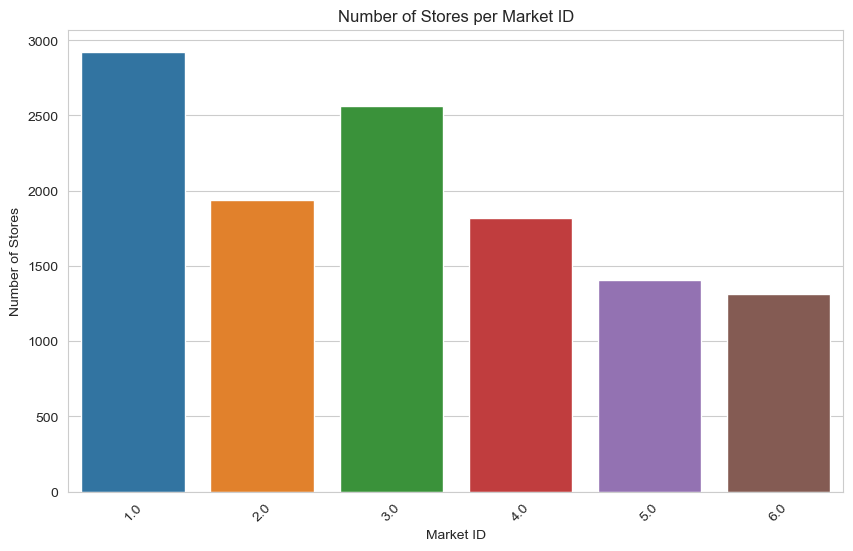

In [529]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Market ID', y='Store Count', data=store_count_per_market)
plt.title('Number of Stores per Market ID')
plt.xlabel('Market ID')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45) 
plt.show()

## from above we can see that market id 1 and 3 are catering most number of stores or restaurants

In [530]:
store_count_per_market = df.groupby('store_id')['market_id'].nunique()
store_count_df = store_count_per_market.reset_index()
store_count_df.columns = ['Store ID', 'Market ID Count']
store_count_df.head()

Store ID  Market ID Count
0         1                1
1         2                1
2         3                1
3         4                4
4         5                1

In [531]:
# Filter stores serving under more than one market ID
stores_serving_multiple_markets = store_count_df[store_count_df['Market ID Count']> 1]
stores_serving_multiple_markets.head() 

Store ID  Market ID Count
3          4                4
8          9                2
13        16                4
14        17                3
16        19                2

In [532]:
markets_store_counts = stores_serving_multiple_markets.groupby('Market ID Count')['Store ID'].nunique().reset_index()
markets_store_counts

Market ID Count  Store ID
0                2      1587
1                3       701
2                4       360
3                5       180
4                6        87

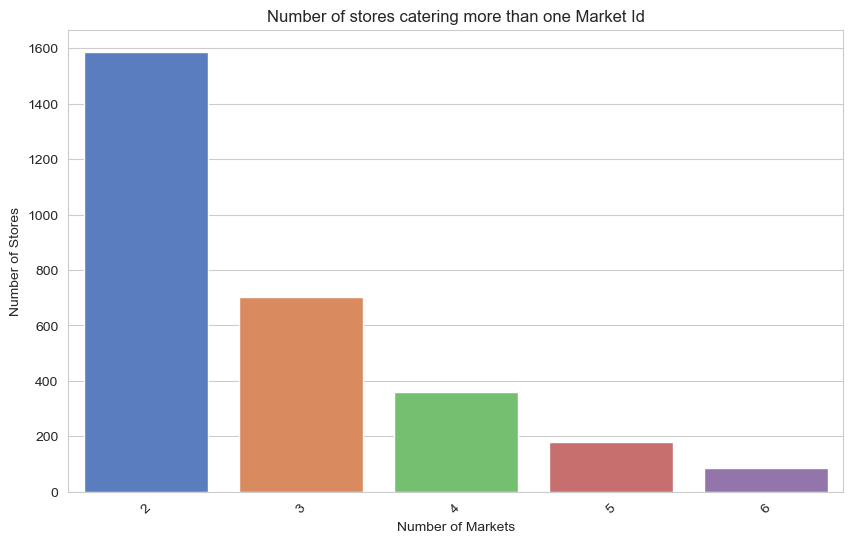

In [533]:
# Plotting the bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Market ID Count', y='Store ID', data=markets_store_counts, palette='muted')
plt.title('Number of stores catering more than one Market Id')
plt.xlabel('Number of Markets')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## from the above chart we can say that 1587 stores are serving more than two Market Id's

In [534]:
df.head()

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  
0                                         861.0  
1                                         690.0  
2                                         690.0  
3                                         289.0  
4                                         650.0

In [535]:
strs_ordrs=df['store_id'].value_counts().reset_index()
strs_ordrs.columns=['Store ID', 'Number of Orders']

In [536]:
tp5_strs=strs_ordrs.head()
tp5_strs

Store ID  Number of Orders
0      6865               937
1      1311               863
2       314               815
3      1686               765
4      3937               721

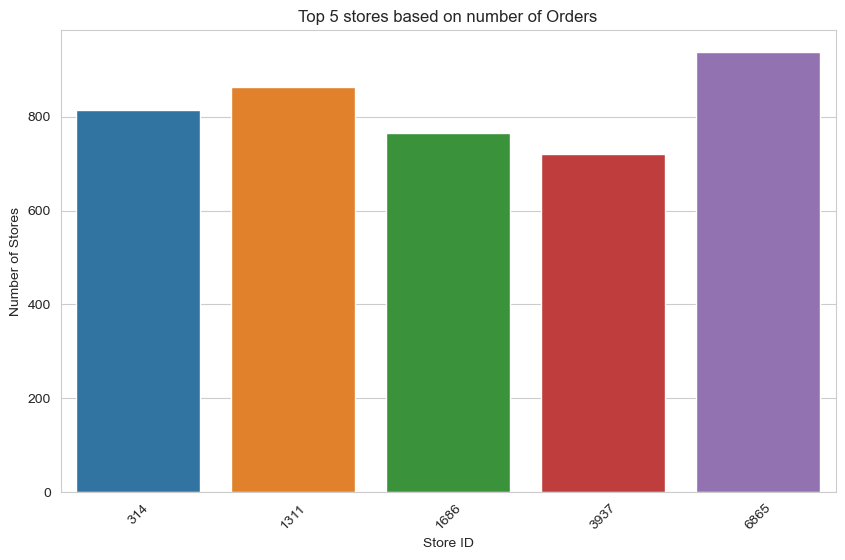

In [537]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Store ID', y='Number of Orders', data=tp5_strs)
plt.title('Top 5 stores based on number of Orders')
plt.xlabel('Store ID')
plt.ylabel('Number of Stores')
plt.xticks(rotation=45) 
plt.show()

In [538]:
strs_ordrs[strs_ordrs['Number of Orders']==1]

Store ID  Number of Orders
6177      5267                 1
6178      6406                 1
6179      5388                 1
6180      1477                 1
6181      5647                 1
...        ...               ...
6738      1258                 1
6739       974                 1
6740      4260                 1
6741      6426                 1
6742      1845                 1

[566 rows x 2 columns]

In [539]:
len(strs_ordrs[strs_ordrs['Number of Orders']==1])

566

## In 4 months 566 Stores got only one order

In [540]:
df.head()

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  
0                                         861.0  
1                                         690.0  
2                                         690.0  
3                                         289.0  
4                                         650.0

In [541]:
cusne_strs=df["store_primary_category"].value_counts().reset_index() 
cusne_strs.columns=['Cusines', 'Number of Orders']

In [542]:
tp5=cusne_strs.head()
tp5

Cusines  Number of Orders
0  american             19399
1     pizza             17321
2   mexican             17099
3    burger             10958
4  sandwich             10060

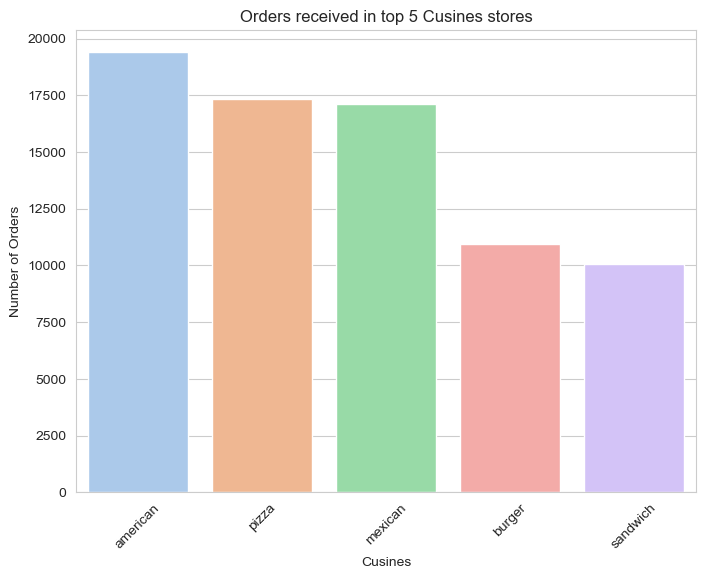

In [543]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.color_palette("pastel")
sns.barplot(x=tp5['Cusines'], y=tp5['Number of Orders'], palette='pastel')
plt.title('Orders received in top 5 Cusines stores')
plt.xlabel('Cusines')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [544]:
btm5=cusne_strs.tail()
btm5

Cusines  Number of Orders
69           lebanese                 9
70            belgian                 2
71         indonesian                 2
72          chocolate                 1
73  alcohol-plus-food                 1

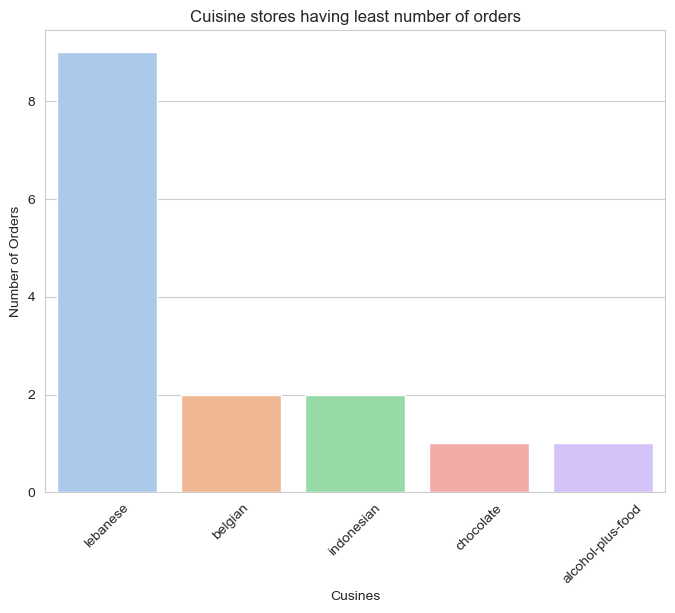

In [545]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.color_palette("pastel")
sns.barplot(x=btm5['Cusines'], y=btm5['Number of Orders'], palette='pastel')
plt.title('Cuisine stores having least number of orders')
plt.xlabel('Cusines')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [546]:
df.groupby(['market_id','store_primary_category']).size()

market_id  store_primary_category
1.0        afghan                       4
           alcohol                     81
           alcohol-plus-food            1
           american                  5228
           argentine                   43
                                     ... 
6.0        thai                       918
           turkish                     16
           vegan                       42
           vegetarian                  83
           vietnamese                 444
Length: 385, dtype: int64

In [547]:
csne_strs_c=df.groupby(['market_id','store_primary_category']).size().reset_index(name='count')
csne_strs_c

market_id store_primary_category  count
0          1.0                 afghan      4
1          1.0                alcohol     81
2          1.0      alcohol-plus-food      1
3          1.0               american   5228
4          1.0              argentine     43
..         ...                    ...    ...
380        6.0                   thai    918
381        6.0                turkish     16
382        6.0                  vegan     42
383        6.0             vegetarian     83
384        6.0             vietnamese    444

[385 rows x 3 columns]

In [548]:
most_frequent_cuisine_str = csne_strs_c.groupby('market_id').apply(lambda x: x.loc[x['count'].idxmax()])
most_frequent_cuisine_str

market_id store_primary_category  count
market_id                                         
1.0              1.0               american   5228
2.0              2.0                mexican   6647
3.0              3.0               american   2743
4.0              4.0                  pizza   3840
5.0              5.0               american   2386
6.0              6.0                  pizza   1230

In [549]:
least_frequent_cuisine_str = csne_strs_c.groupby('market_id').apply(lambda x: x.loc[x['count'].idxmin()])
least_frequent_cuisine_str

market_id store_primary_category  count
market_id                                         
1.0              1.0      alcohol-plus-food      1
2.0              2.0              argentine      1
3.0              3.0              ethiopian      1
4.0              4.0              argentine      1
5.0              5.0              argentine      1
6.0              6.0                 cheese      1

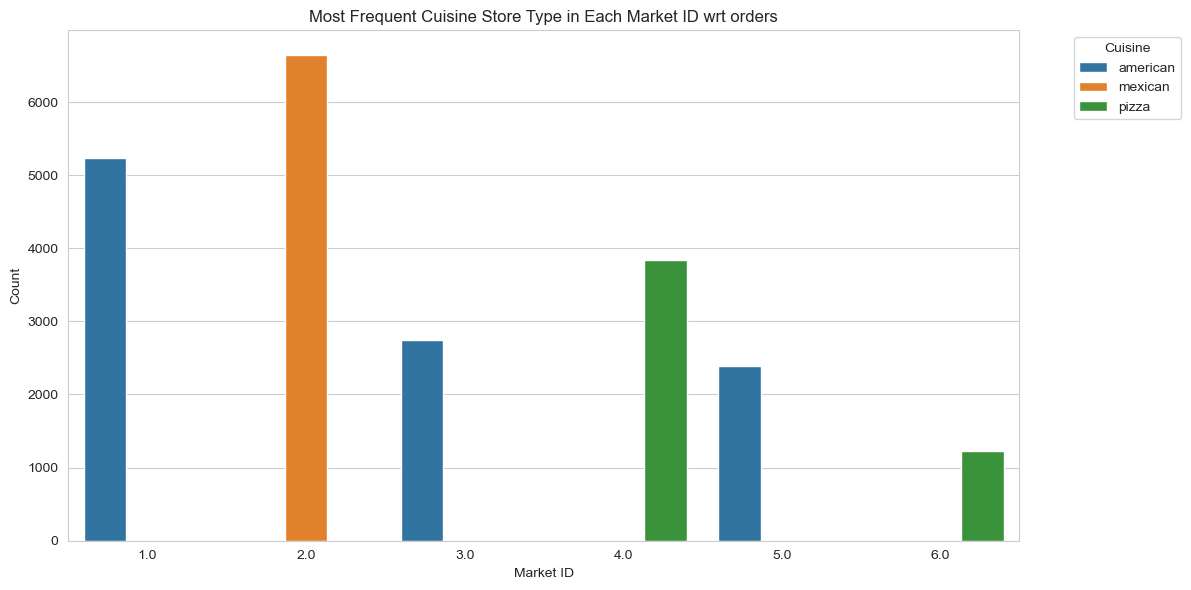

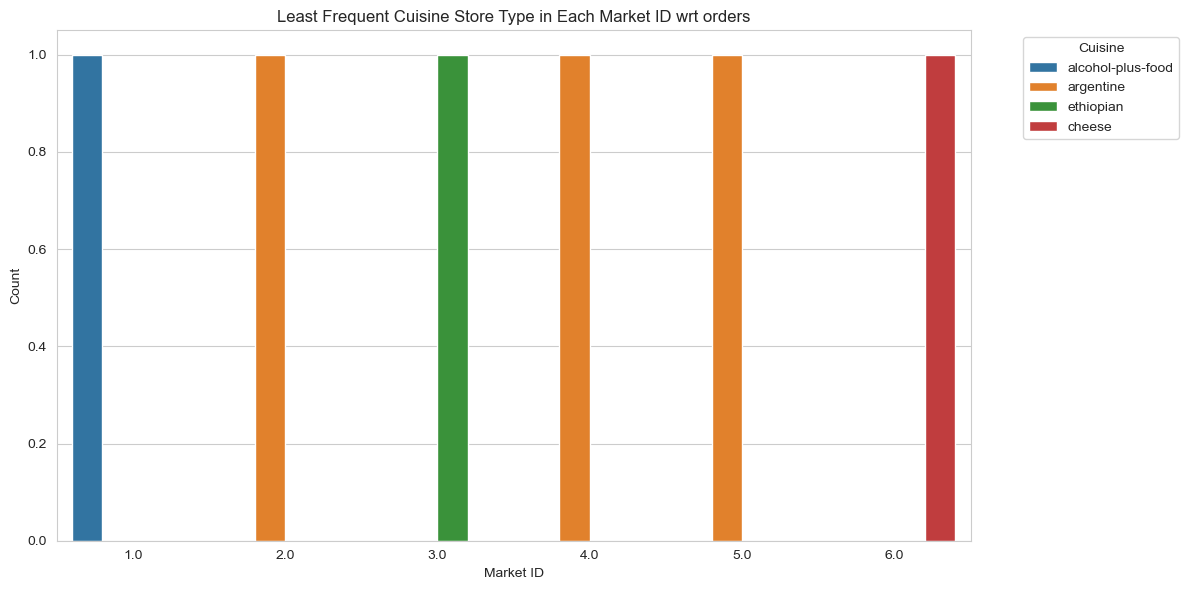

In [550]:
plt.figure(figsize=(12, 6))
sns.barplot(x='market_id', y='count', hue='store_primary_category', data=most_frequent_cuisine_str)
plt.title('Most Frequent Cuisine Store Type in Each Market ID wrt orders')
plt.xlabel('Market ID')
plt.ylabel('Count')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Plotting the bar graph using Seaborn for the least frequent cuisine
plt.figure(figsize=(12, 6))
sns.barplot(x='market_id', y='count', hue='store_primary_category', data=least_frequent_cuisine_str)
plt.title('Least Frequent Cuisine Store Type in Each Market ID wrt orders')
plt.xlabel('Market ID')
plt.ylabel('Count')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [551]:
df.head()

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  
0                                         861.0  
1                                         690.0  
2                                         690.0  
3                                         289.0  
4                                         650.0

In [552]:
markets_store_counts = stores_serving_multiple_markets.groupby('Market ID Count')['Store ID'].nunique().reset_index()
markets_store_counts

Market ID Count  Store ID
0                2      1587
1                3       701
2                4       360
3                5       180
4                6        87

In [553]:
df_time=df.copy()
df_time['date']=df_time['created_at'].dt.date

In [554]:
df_time.head()

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration        date  
0                                         861.0  2015-02-06  
1                                         690.0  2015-02-10  
2                                         690.0  2015-01-22  
3                                         289.0  2015-02-03  
4                                         650.0  2015-02-15

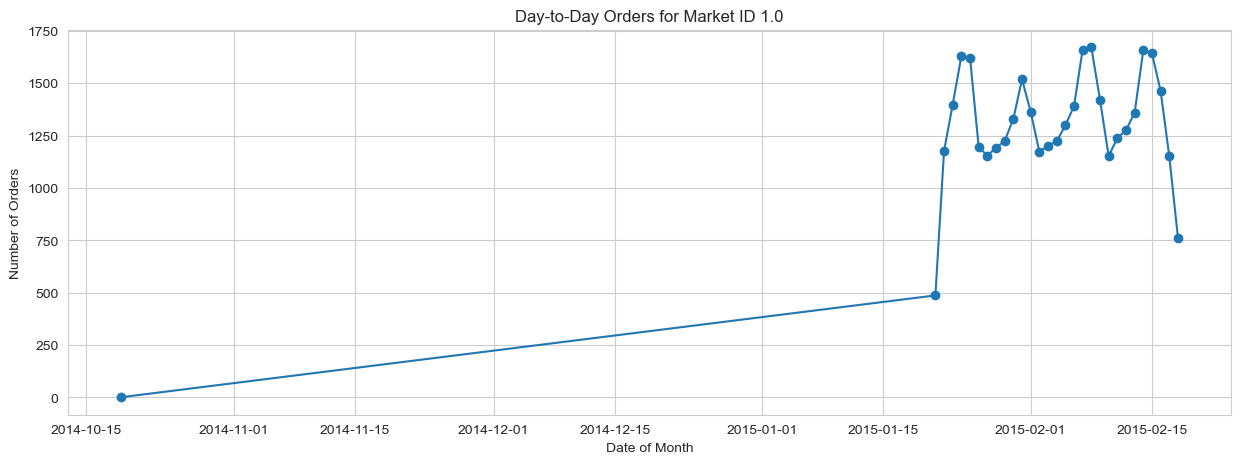

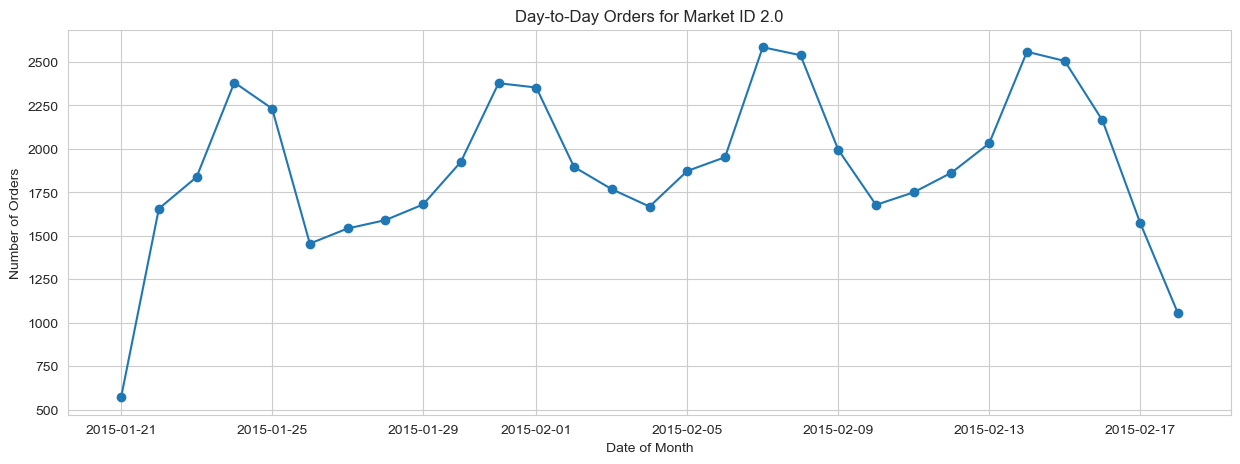

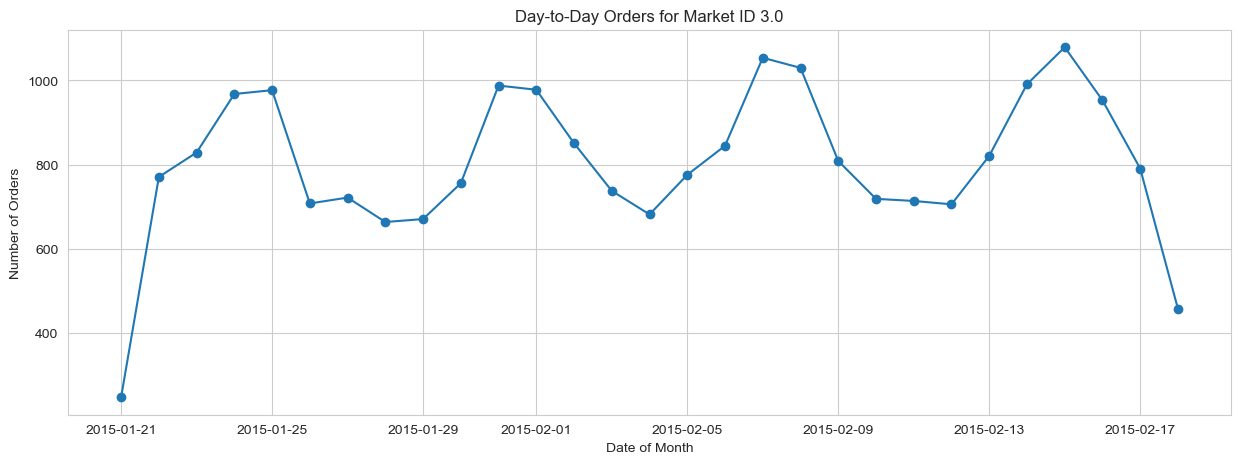

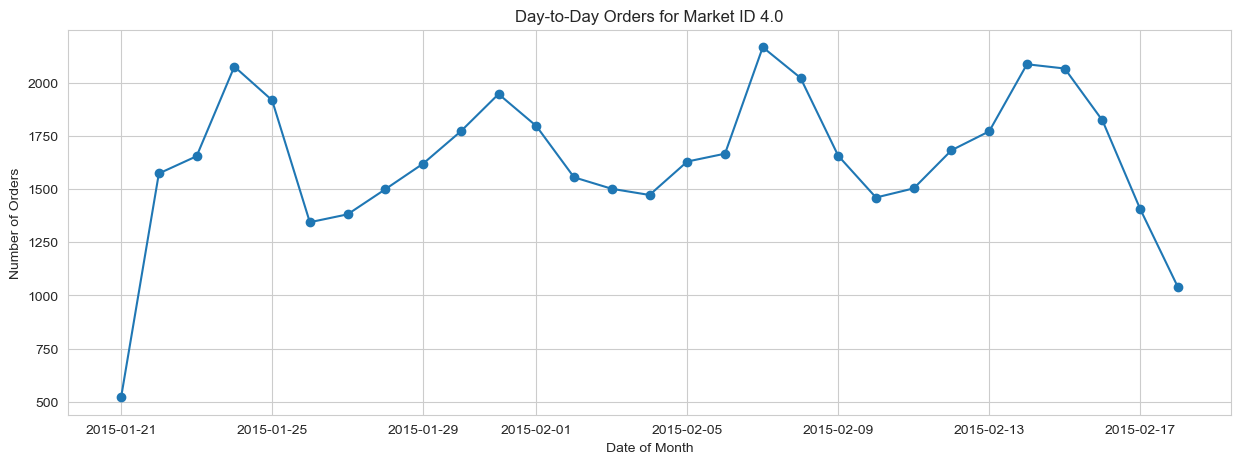

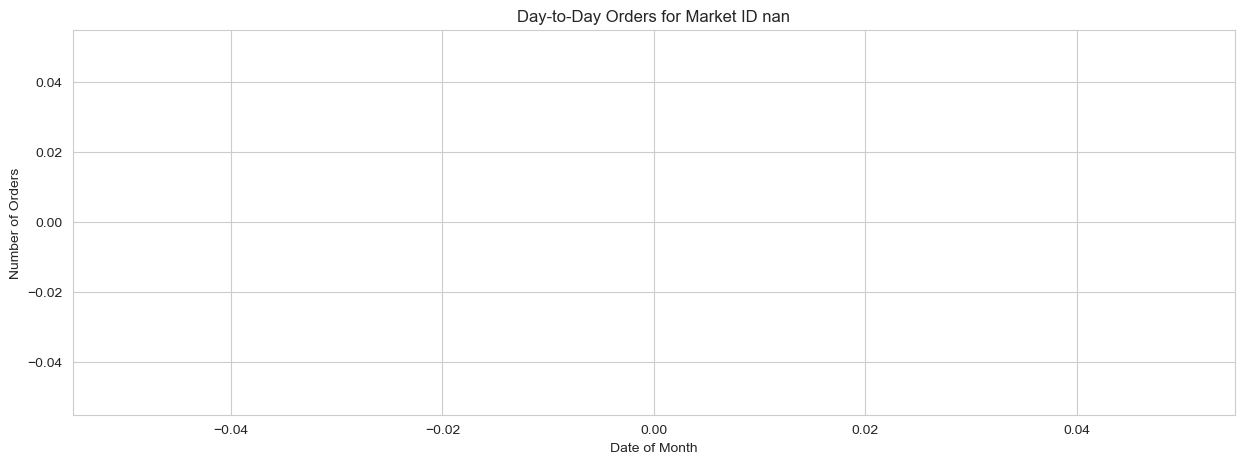

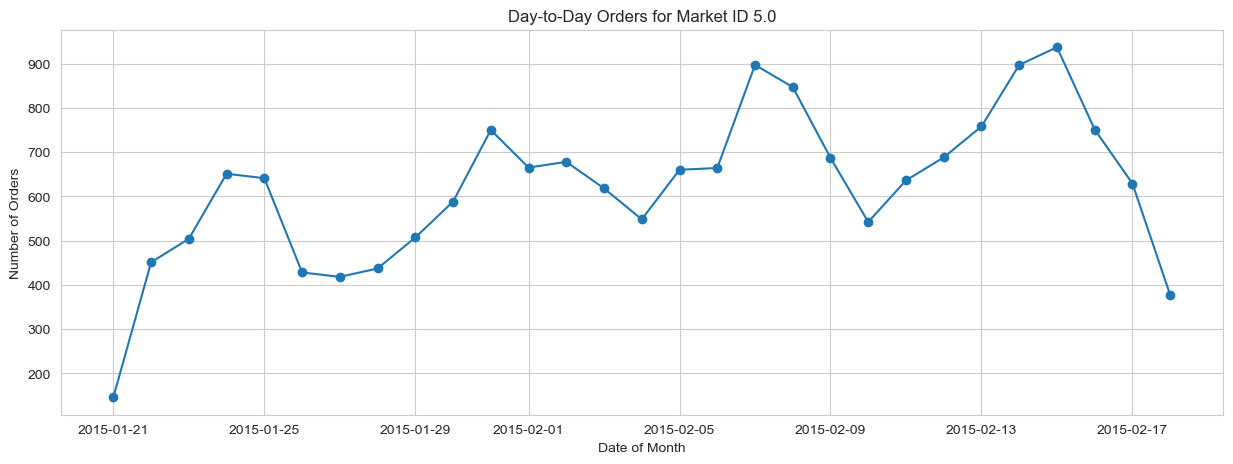

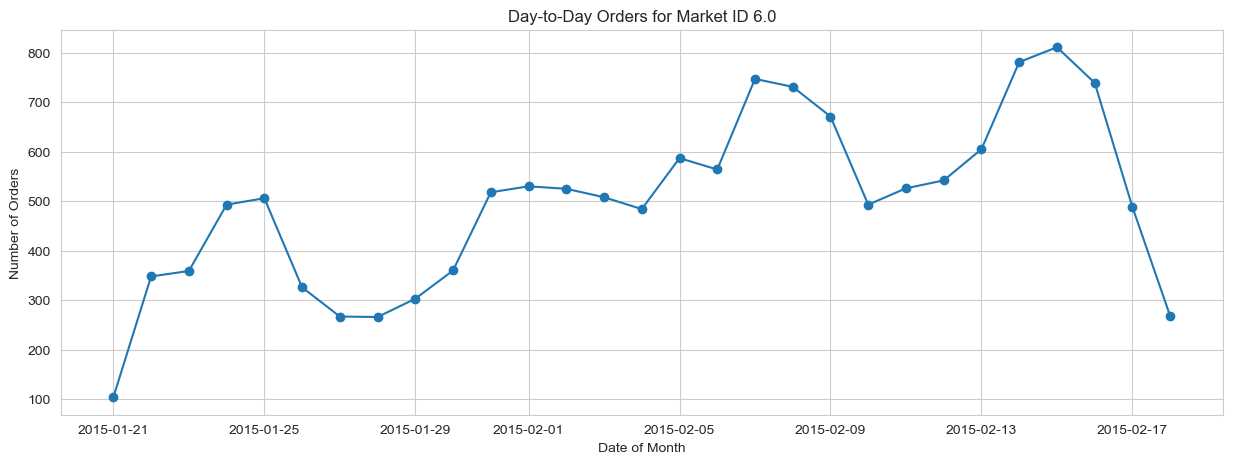

In [555]:
market_ids = df_time['market_id'].unique()
for market_id in market_ids:
    market_df = df_time[df_time['market_id'] == market_id]
    
    str_dt=market_df['date'].value_counts().reset_index()
    str_dt.columns=['date','num of orders']
    str_dt_sorted = str_dt.sort_values(by='date')
    
    plt.figure(figsize=(15, 5))
    plt.plot(str_dt_sorted['date'], str_dt_sorted['num of orders'], marker='o')

    plt.title(f'Day-to-Day Orders for Market ID {market_id}')
    plt.xlabel('Date of Month')
    plt.ylabel('Number of Orders')
    plt.grid(True)
    plt.show()

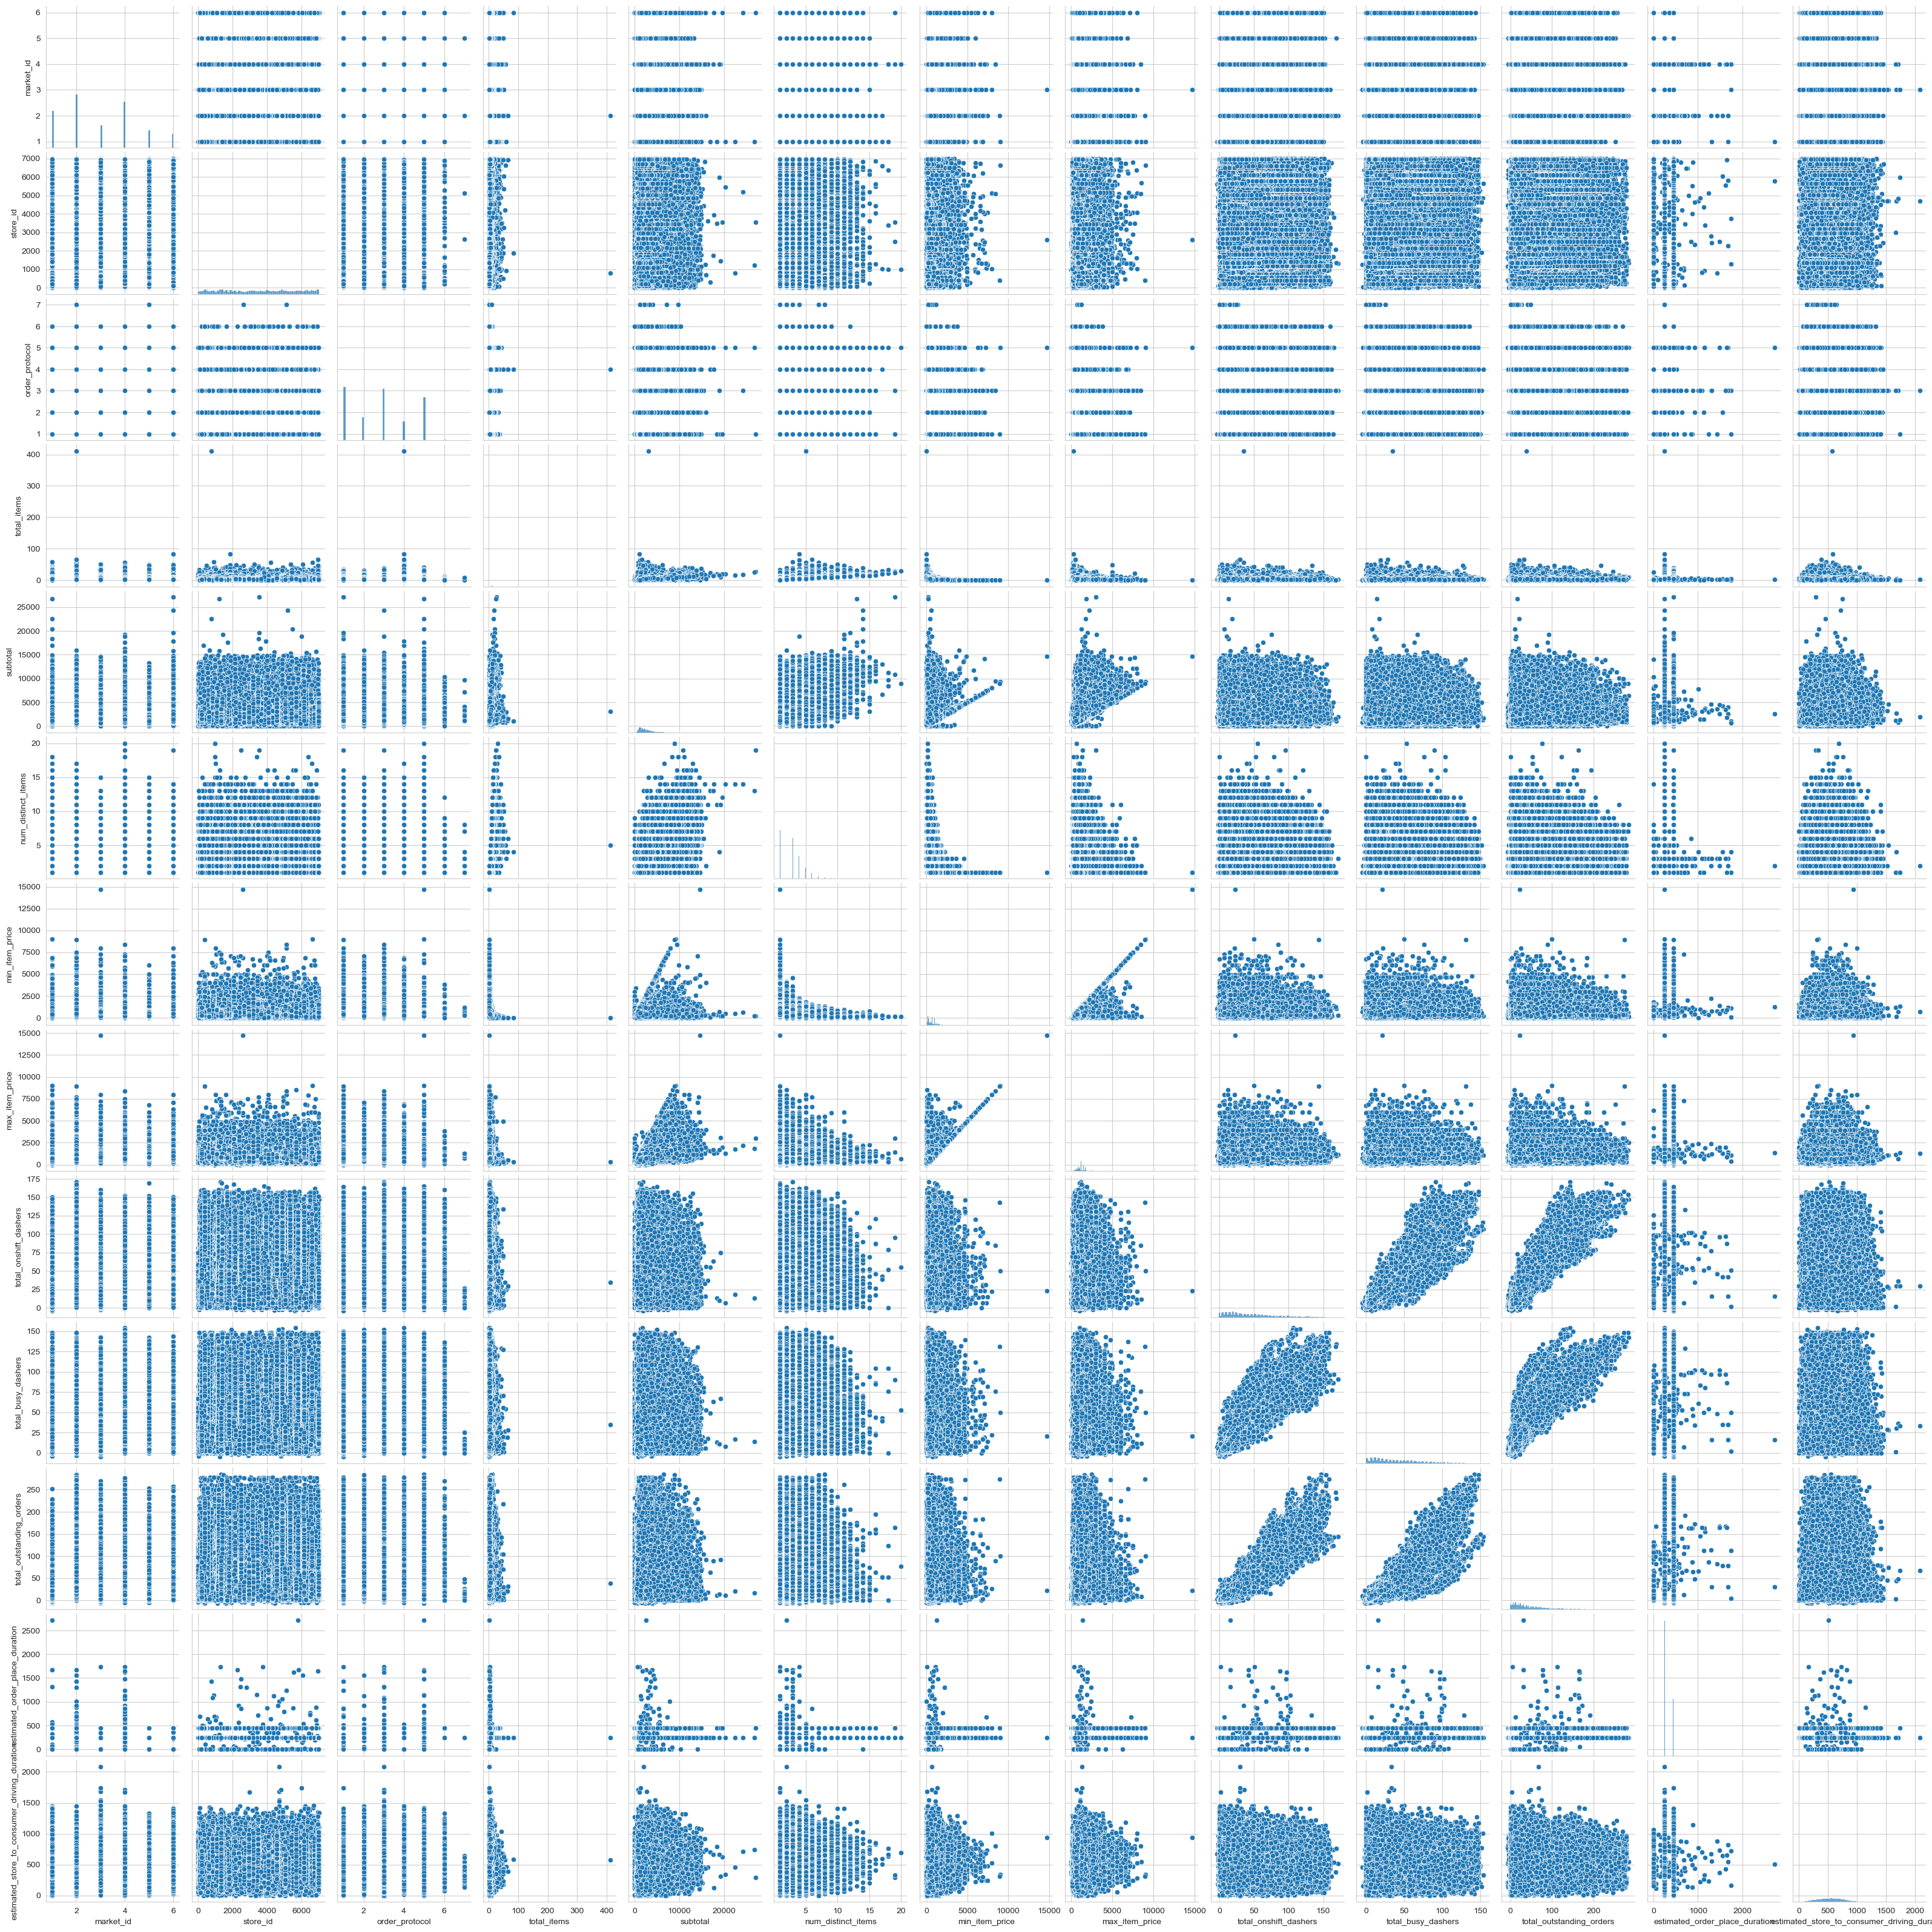

In [448]:
sns.pairplot(df)

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [557]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [558]:
df['market_id'].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.])

In [559]:
df['market_id'].value_counts()

2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: market_id, dtype: int64

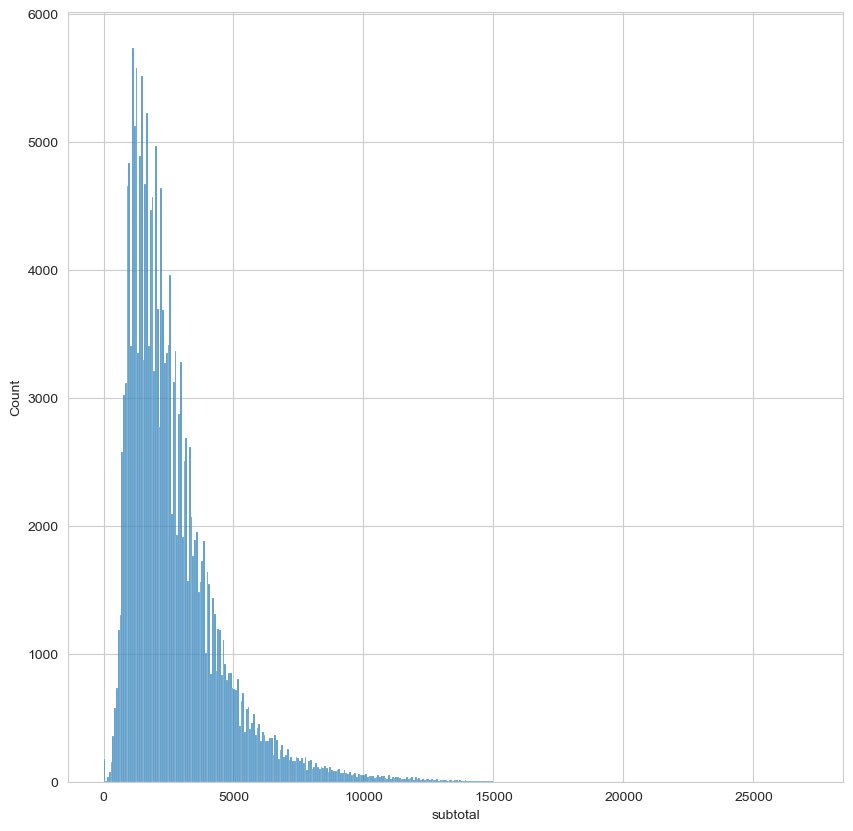

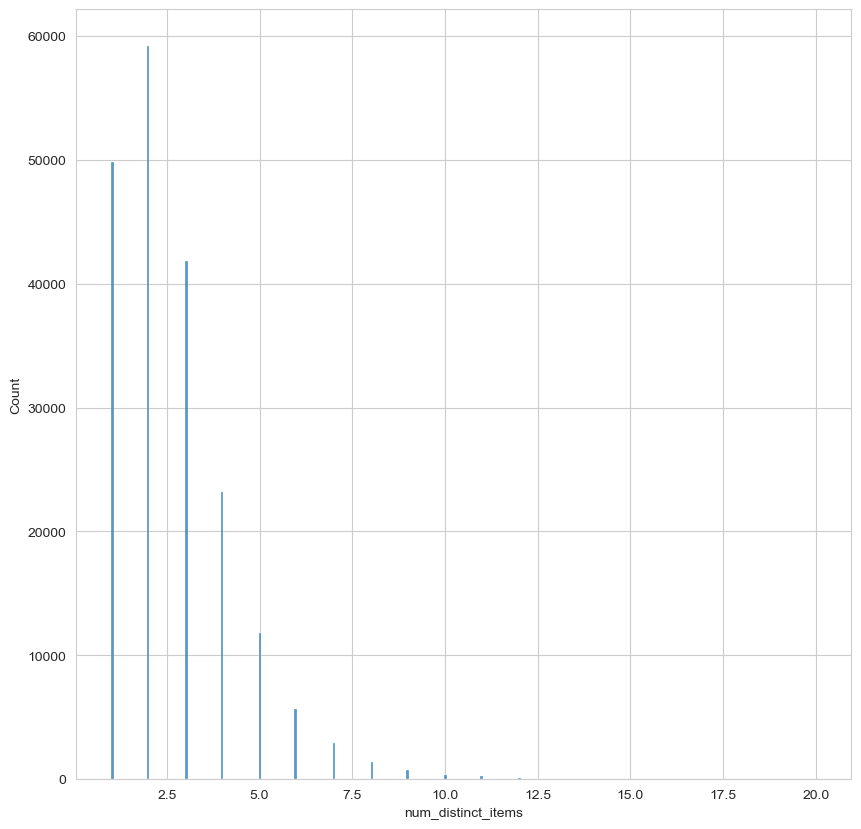

In [453]:
num_list=['subtotal',
       'num_distinct_items']
for i in range(0,len(num_list)):
  primary_num=num_list[i]
  plt.figure(figsize=(10,10))
  chart=sns.histplot(df[primary_num])

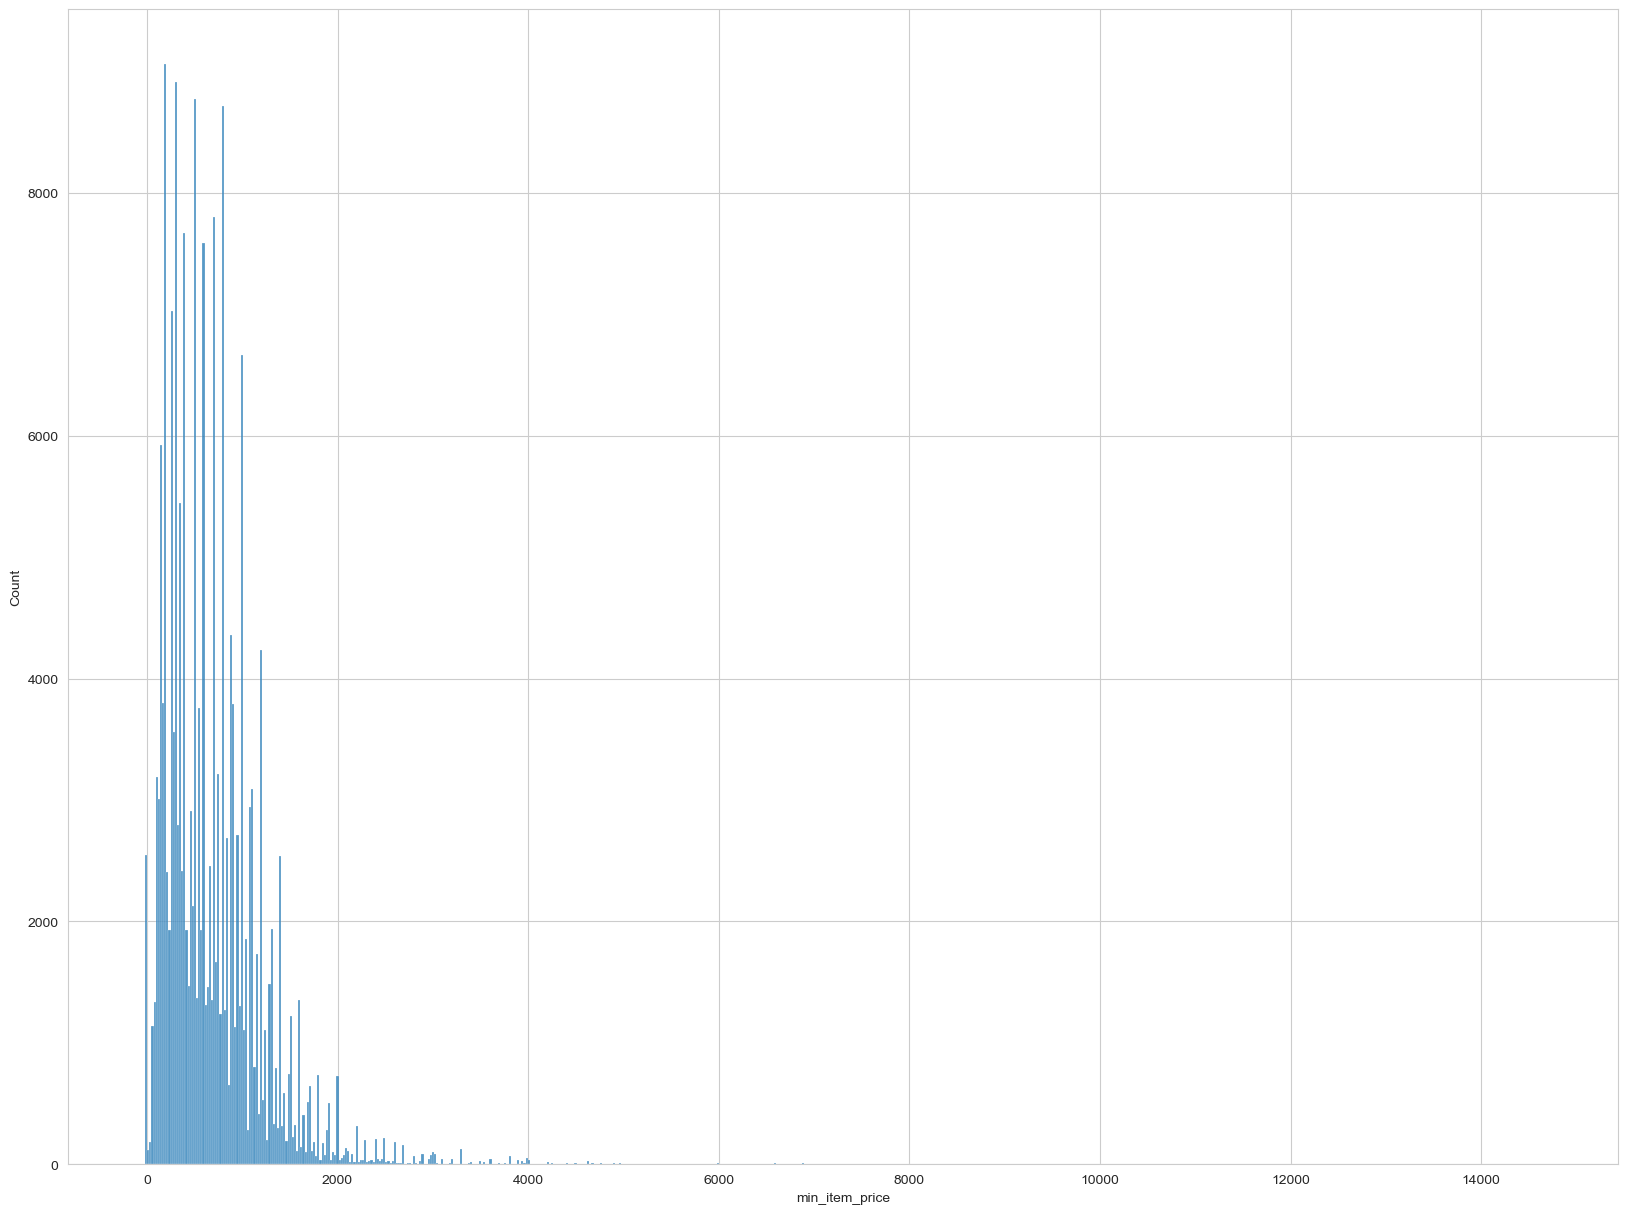

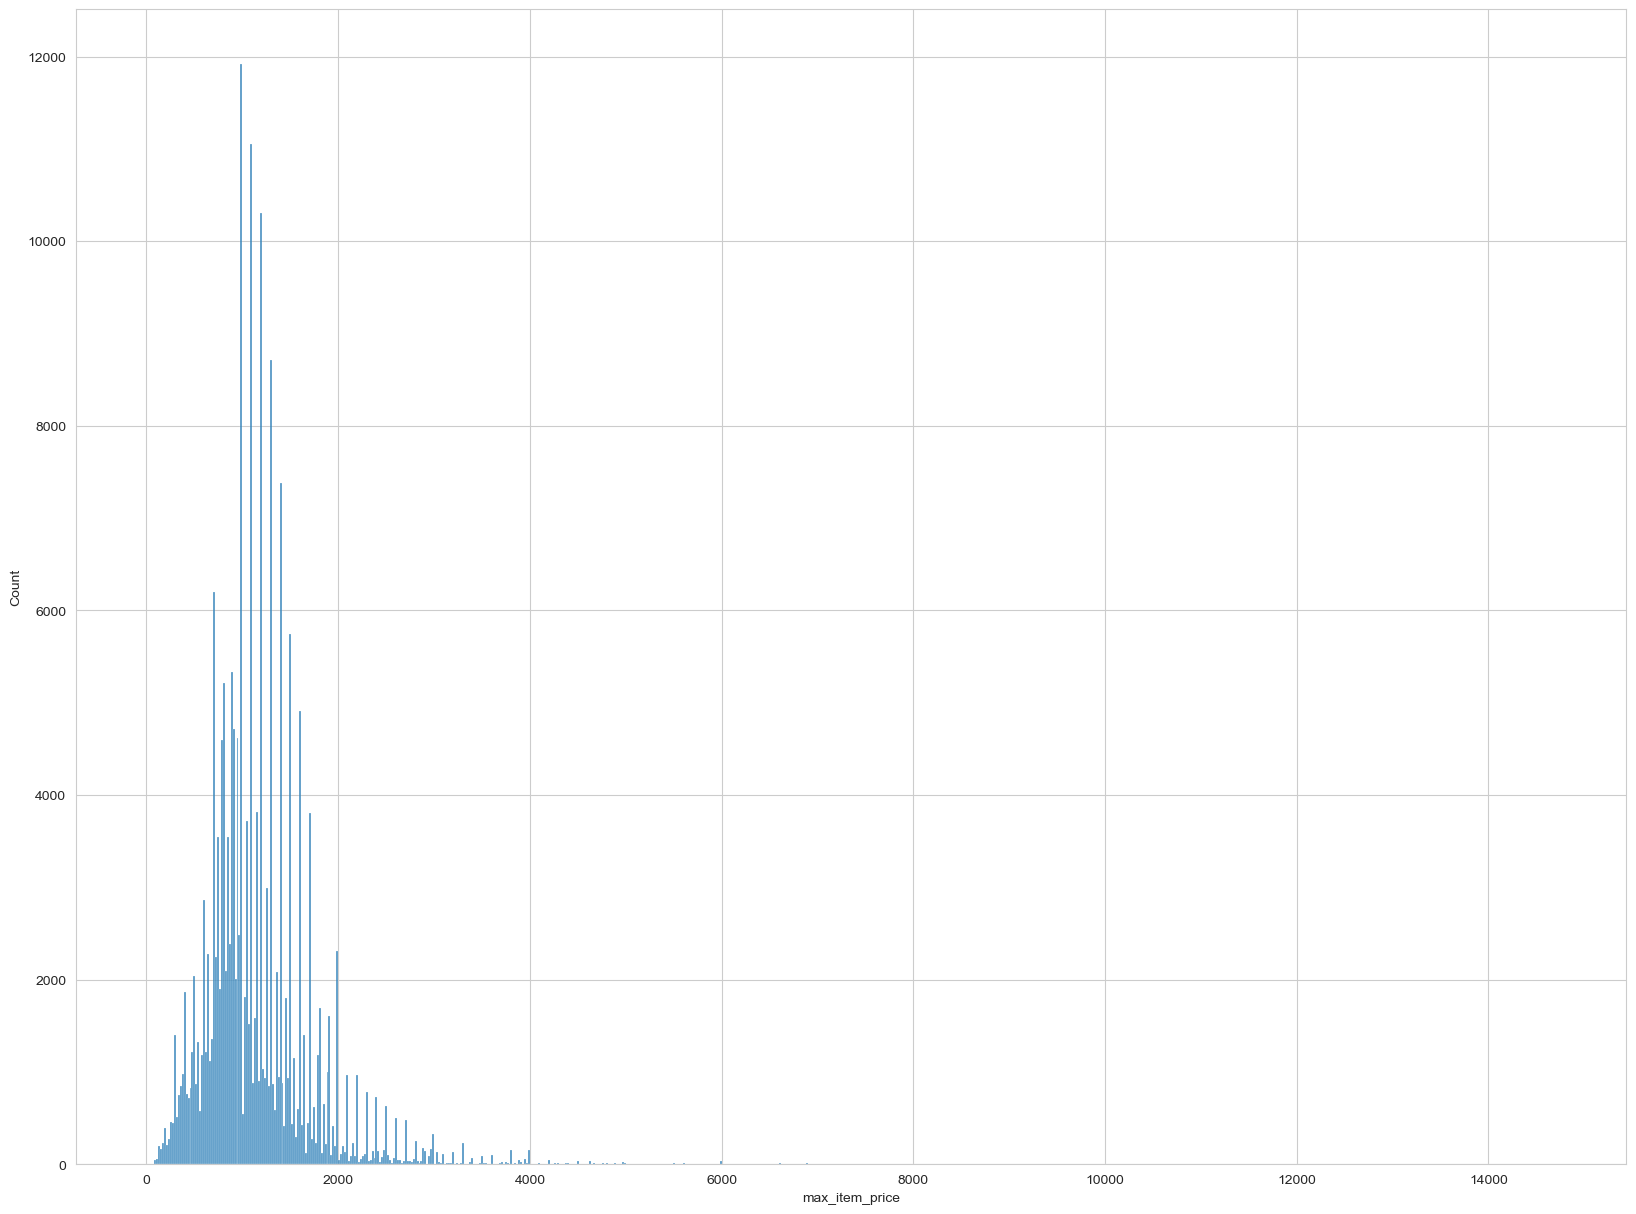

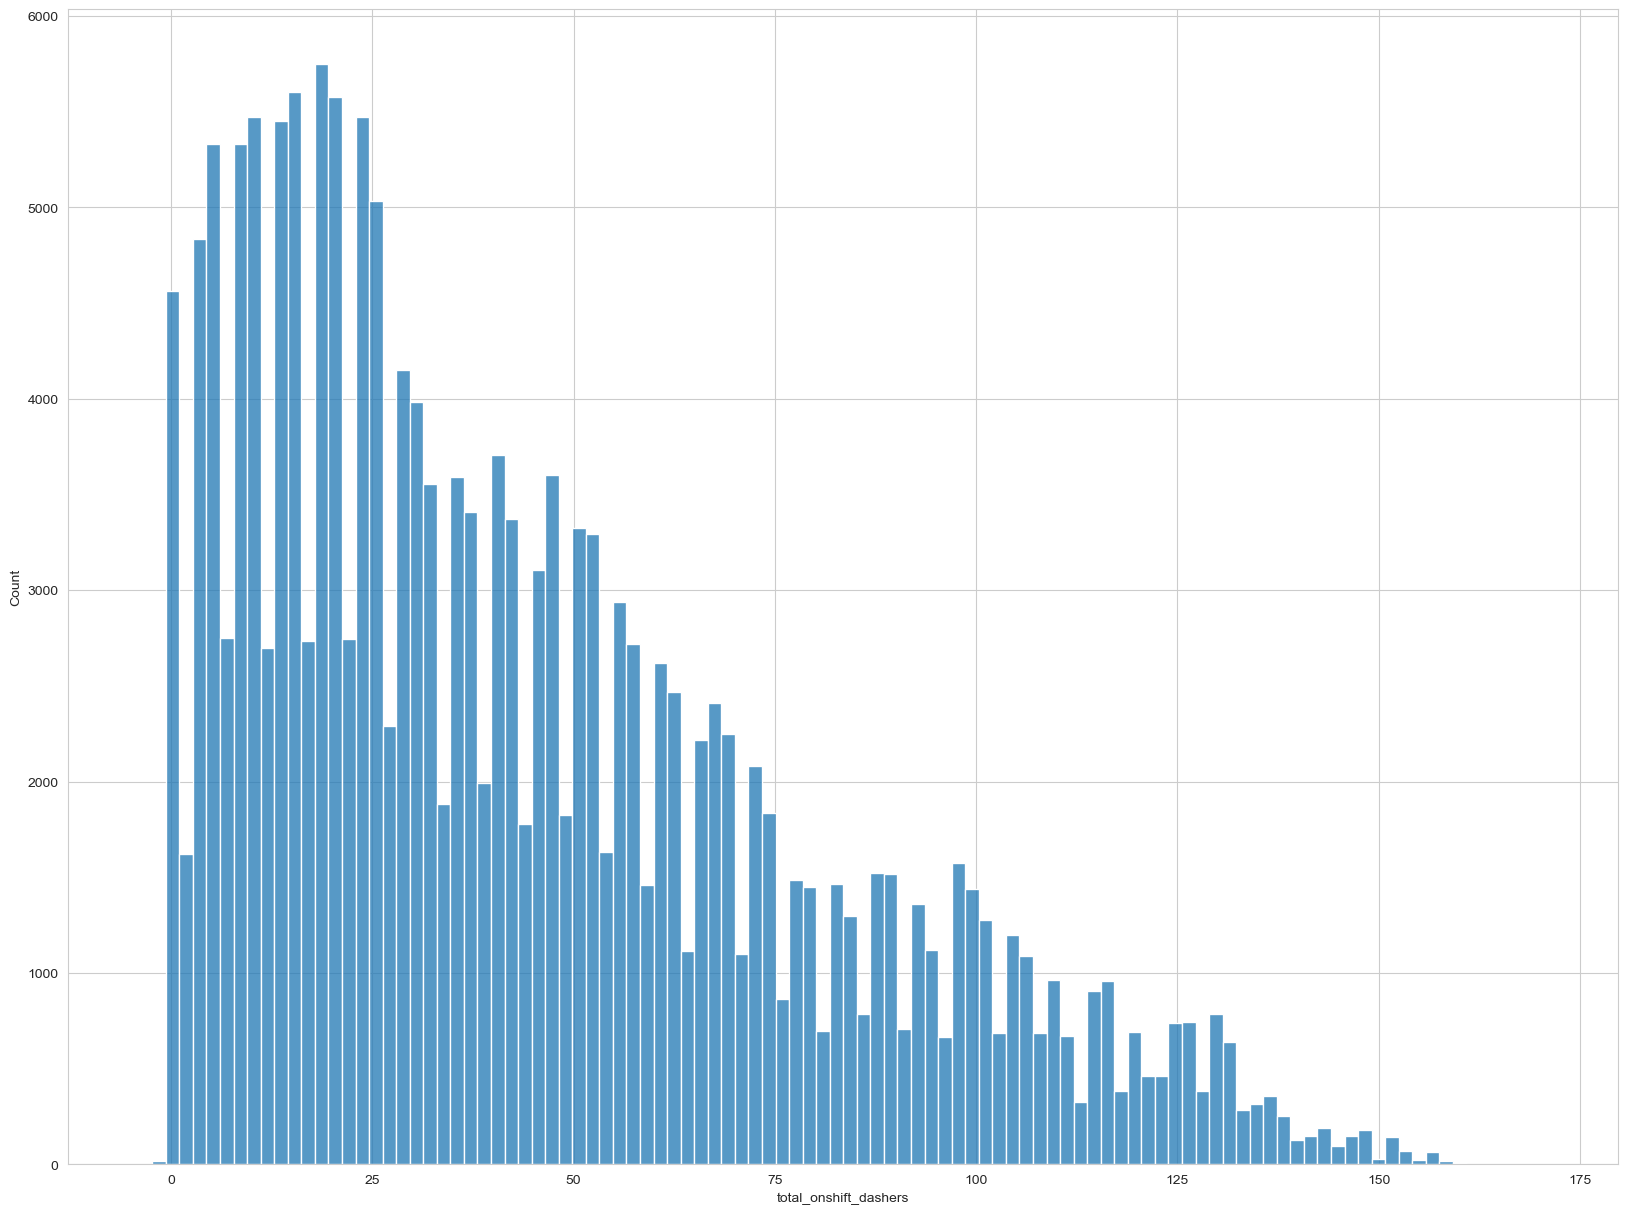

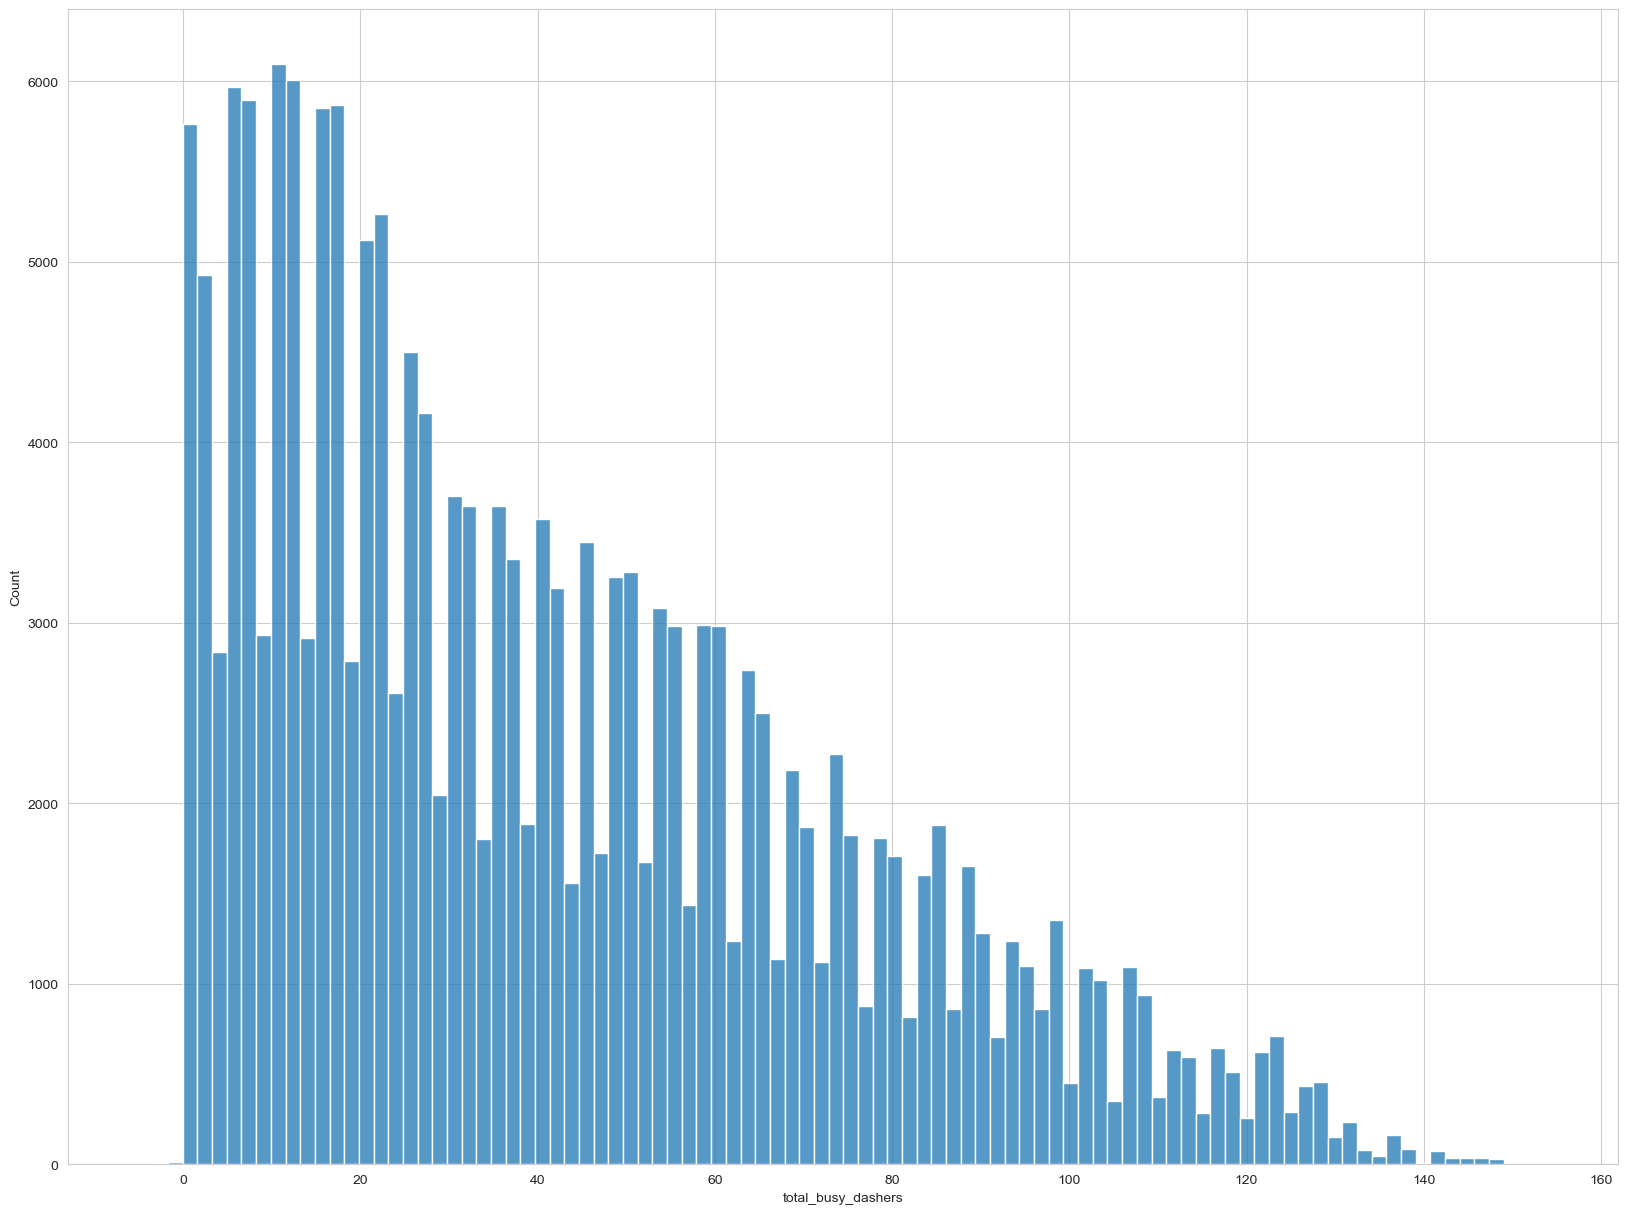

In [454]:
num_list=['min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers'
       ]
for i in range(0,len(num_list)):
  primary_num=num_list[i]
  plt.figure(figsize=(20,15))
  chart=sns.histplot(df[primary_num])

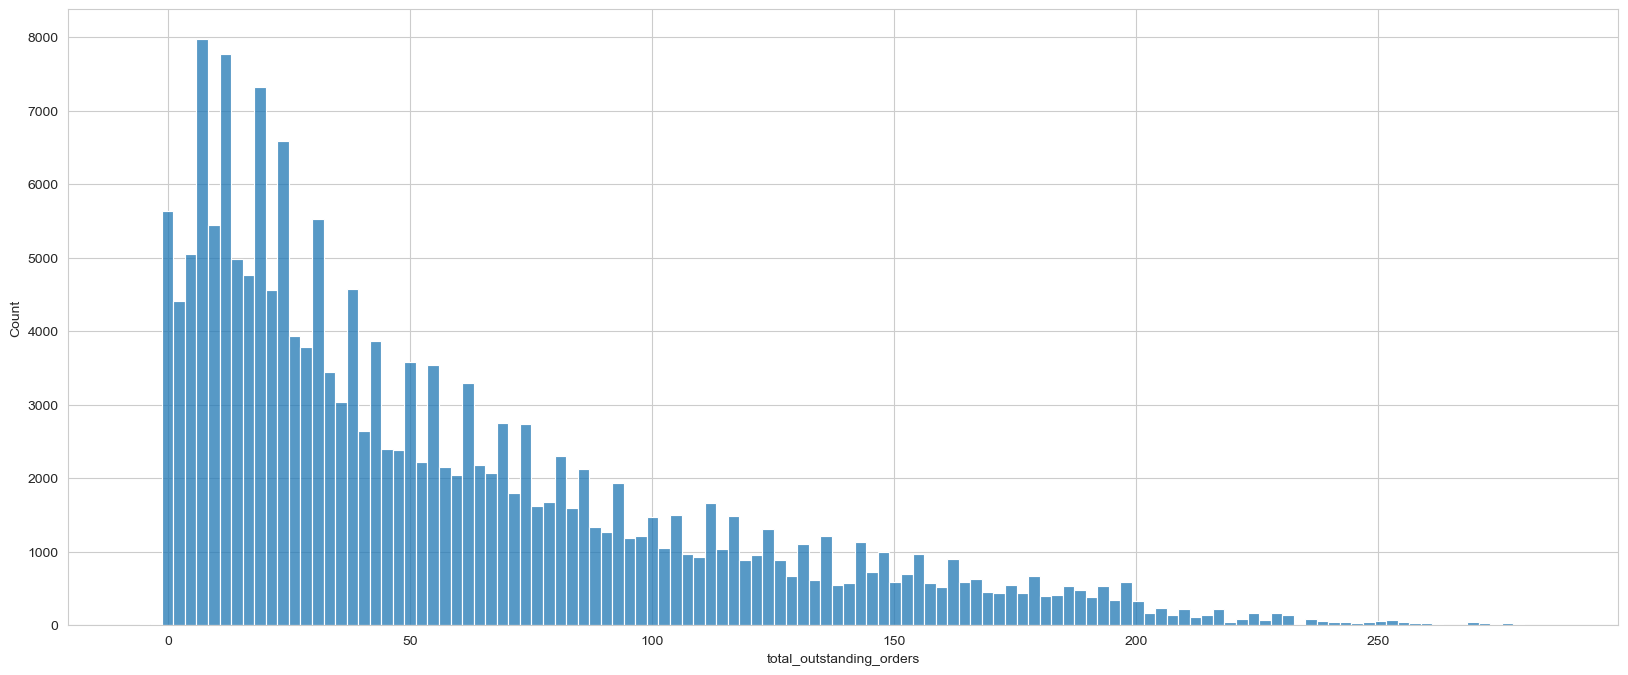

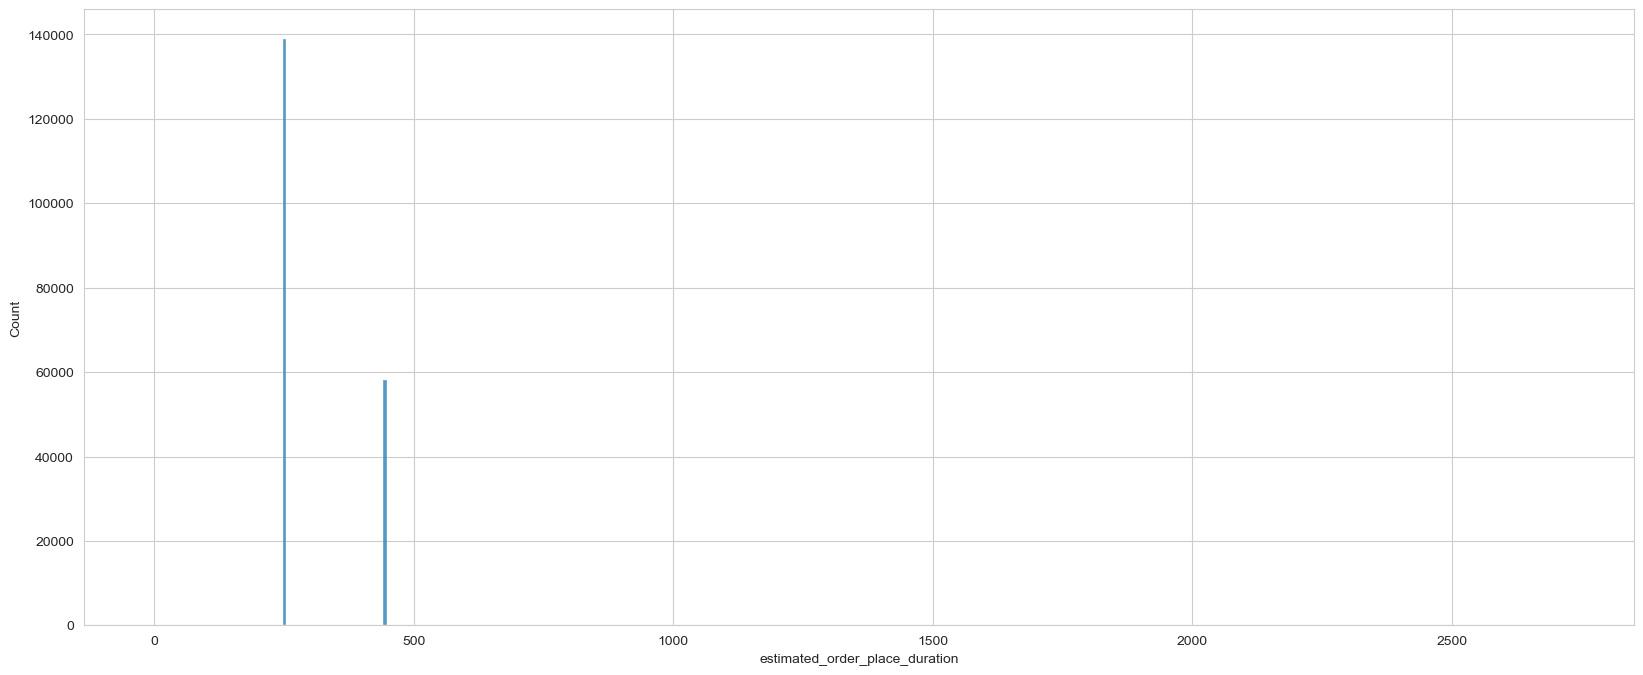

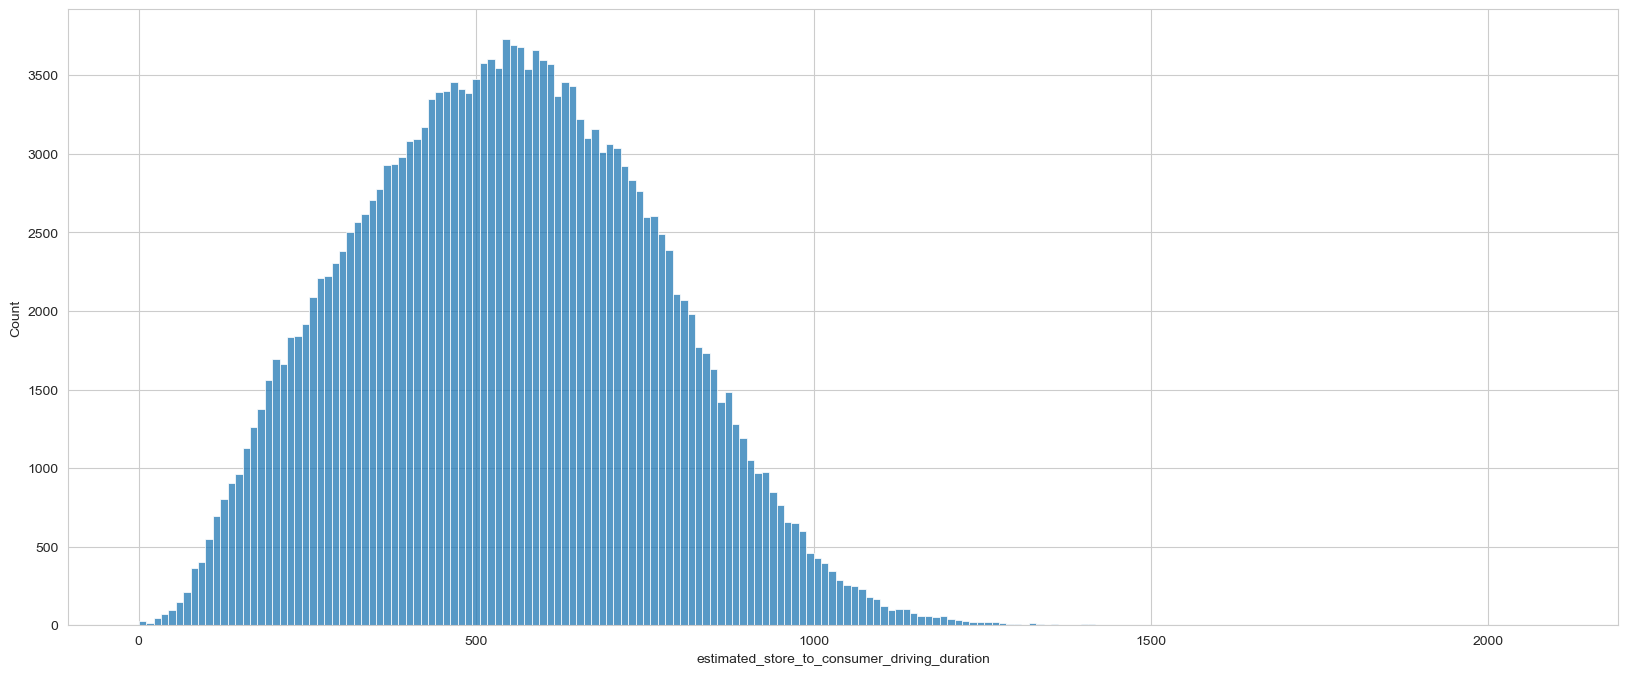

In [455]:
num_list=[
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration']
for i in range(0,len(num_list)):
  primary_num=num_list[i]
  plt.figure(figsize=(20,8))
  chart=sns.histplot(df[primary_num])

# Boxplots

In [456]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [460]:
data_num=df[['market_id', 'store_id',
        'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration'
       ]]

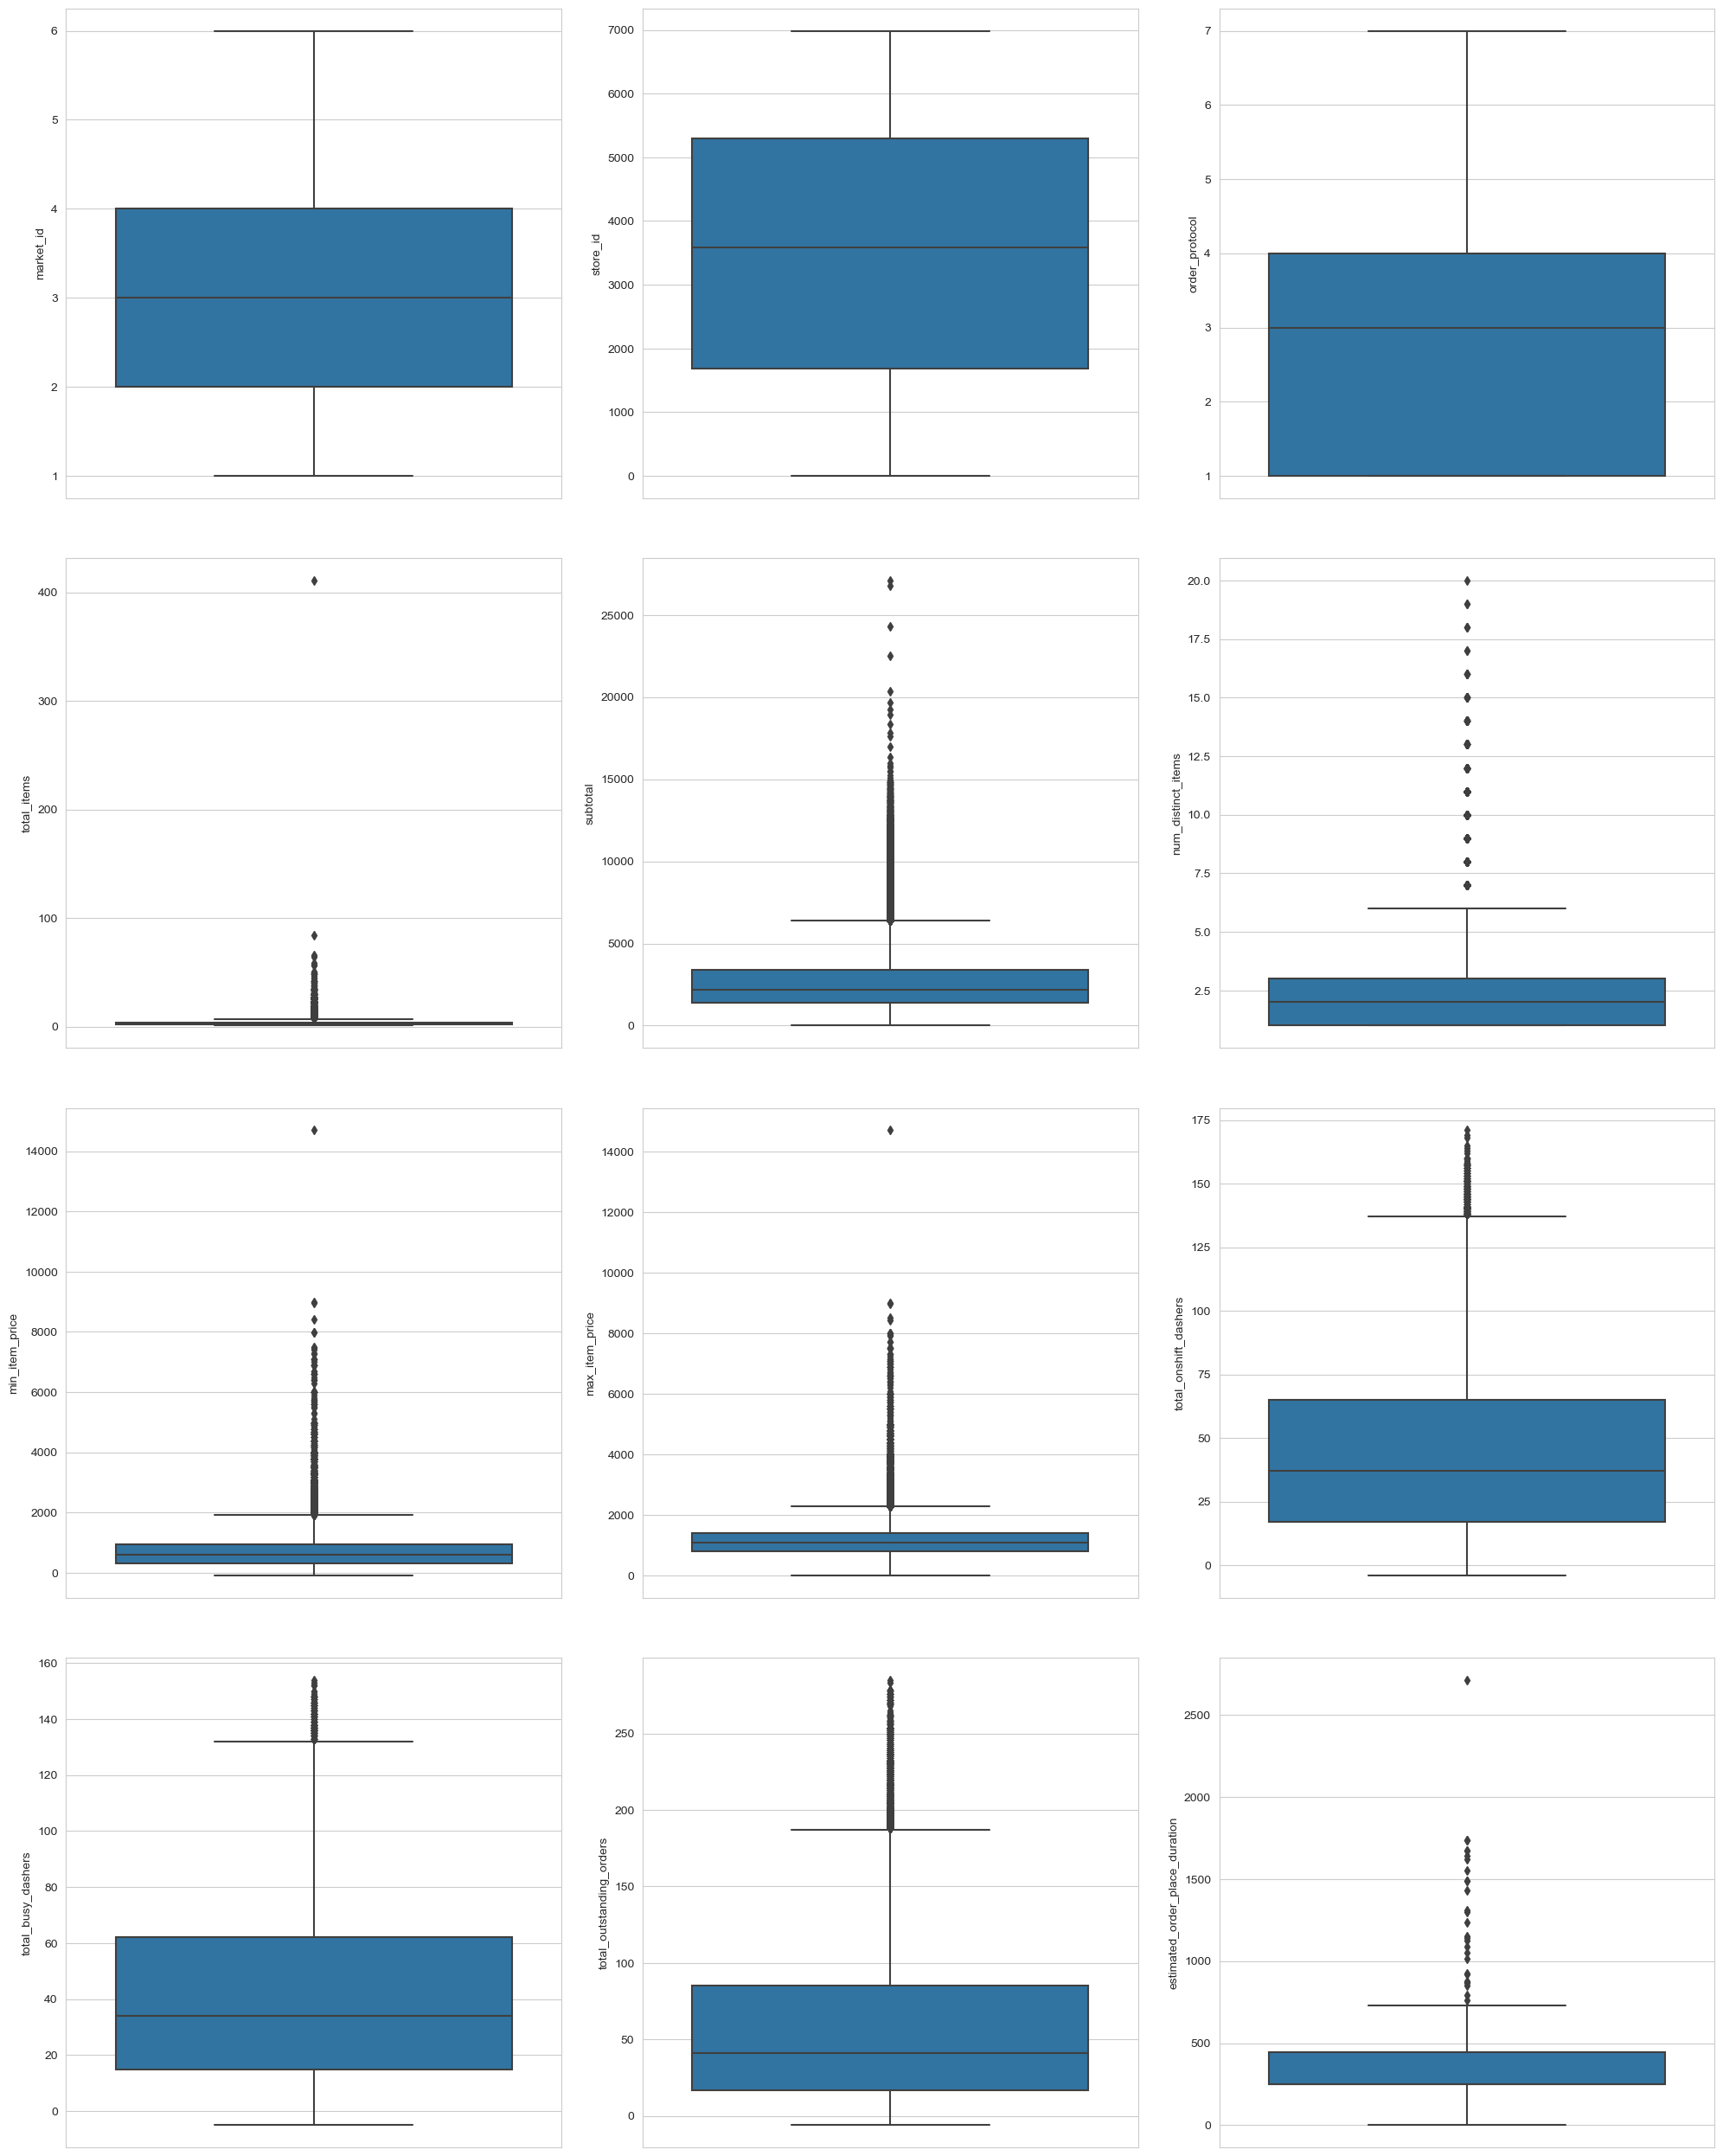

In [461]:
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20, 25))
index = 0
axs = axs.flatten()

for k,v in data_num.items():
    sns.boxplot(y=k, data=data_num, ax=axs[index])
    index += 1
    plt.tight_layout(pad=1, w_pad=2, h_pad=5.0)

## We can see that there are outliers in the data

# Data Imputation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [9]:
df['market_id']=df['market_id'].astype('str')
df['order_protocol']=df['order_protocol'].astype('str')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     197428 non-null  object        
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                197428 non-null  object        
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [11]:
df.isna().sum()

market_id                                           0
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                      0
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [12]:
(df.isna().sum()/len(df))*100

market_id                                       0.000000
created_at                                      0.000000
actual_delivery_time                            0.003546
store_id                                        0.000000
store_primary_category                          2.411006
order_protocol                                  0.000000
total_items                                     0.000000
subtotal                                        0.000000
num_distinct_items                              0.000000
min_item_price                                  0.000000
max_item_price                                  0.000000
total_onshift_dashers                           8.236927
total_busy_dashers                              8.236927
total_outstanding_orders                        8.236927
estimated_order_place_duration                  0.000000
estimated_store_to_consumer_driving_duration    0.266426
dtype: float64

In [13]:
df['market_id'].fillna(df['market_id'].mode(),inplace=True)
df['actual_delivery_time'].fillna(df['actual_delivery_time'].median(),inplace=True)
df['order_protocol'].fillna(df['order_protocol'].mode(),inplace=True)
df['total_onshift_dashers'].fillna(df['total_onshift_dashers'].median(),inplace=True)
df['total_busy_dashers'].fillna(df['total_busy_dashers'].median(),inplace=True)
df['total_outstanding_orders'].fillna(df['total_outstanding_orders'].median(),inplace=True)
df['estimated_store_to_consumer_driving_duration'].fillna(df['estimated_store_to_consumer_driving_duration'].median(),inplace=True)

In [14]:
df.isna().sum()

market_id                                          0
created_at                                         0
actual_delivery_time                               0
store_id                                           0
store_primary_category                          4760
order_protocol                                     0
total_items                                        0
subtotal                                           0
num_distinct_items                                 0
min_item_price                                     0
max_item_price                                     0
total_onshift_dashers                              0
total_busy_dashers                                 0
total_outstanding_orders                           0
estimated_order_place_duration                     0
estimated_store_to_consumer_driving_duration       0
dtype: int64

In [15]:
df['store_primary_category'].mode()

0    american
Name: store_primary_category, dtype: object

In [16]:
df['store_primary_category'].fillna('american',inplace=True)

In [17]:
df.isna().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
dtype: int64

In [18]:
df['store_id']=df['store_id'].astype('str')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     197428 non-null  object        
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197428 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  object        
 4   store_primary_category                        197428 non-null  object        
 5   order_protocol                                197428 non-null  object        
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [20]:
rqrd_lst=[]
for i in df.columns:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        rqrd_lst.append(i)

In [21]:
rqrd_lst

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'estimated_order_place_duration',
 'estimated_store_to_consumer_driving_duration']

In [22]:
def remove_outliers(df, columns, threshold=3):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    outliers_mask = z_scores > threshold
    df_cleaned = df[~outliers_mask.any(axis=1)]
    return df_cleaned

# Remove outliers from specified columns
df_cleaned = remove_outliers(df, rqrd_lst)


In [23]:
df_cleaned.head()

market_id          created_at actual_delivery_time store_id  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:27:16     1845   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:56:29     5477   
2       3.0 2015-01-22 20:39:28  2015-01-22 21:09:09     5477   
3       3.0 2015-02-03 21:21:45  2015-02-03 22:13:00     5477   
4       3.0 2015-02-15 02:40:36  2015-02-15 03:20:26     5477   

  store_primary_category order_protocol  total_items  subtotal  \
0               american            1.0            4      3441   
1                mexican            2.0            1      1900   
2               american            1.0            1      1900   
3               american            1.0            6      6900   
4               american            1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  
0                                         861.0  
1                                         690.0  
2                                         690.0  
3                                         289.0  
4                                         650.0

## Checking for duplicate records

In [24]:
df_cleaned.loc[df_cleaned.duplicated(),:]

Empty DataFrame
Columns: [market_id, created_at, actual_delivery_time, store_id, store_primary_category, order_protocol, total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_dashers, total_busy_dashers, total_outstanding_orders, estimated_order_place_duration, estimated_store_to_consumer_driving_duration]
Index: []

## Feature Selection

C:\Users\Mansoor\AppData\Local\Temp\ipykernel_23344\3802095628.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df_cleaned.corr()


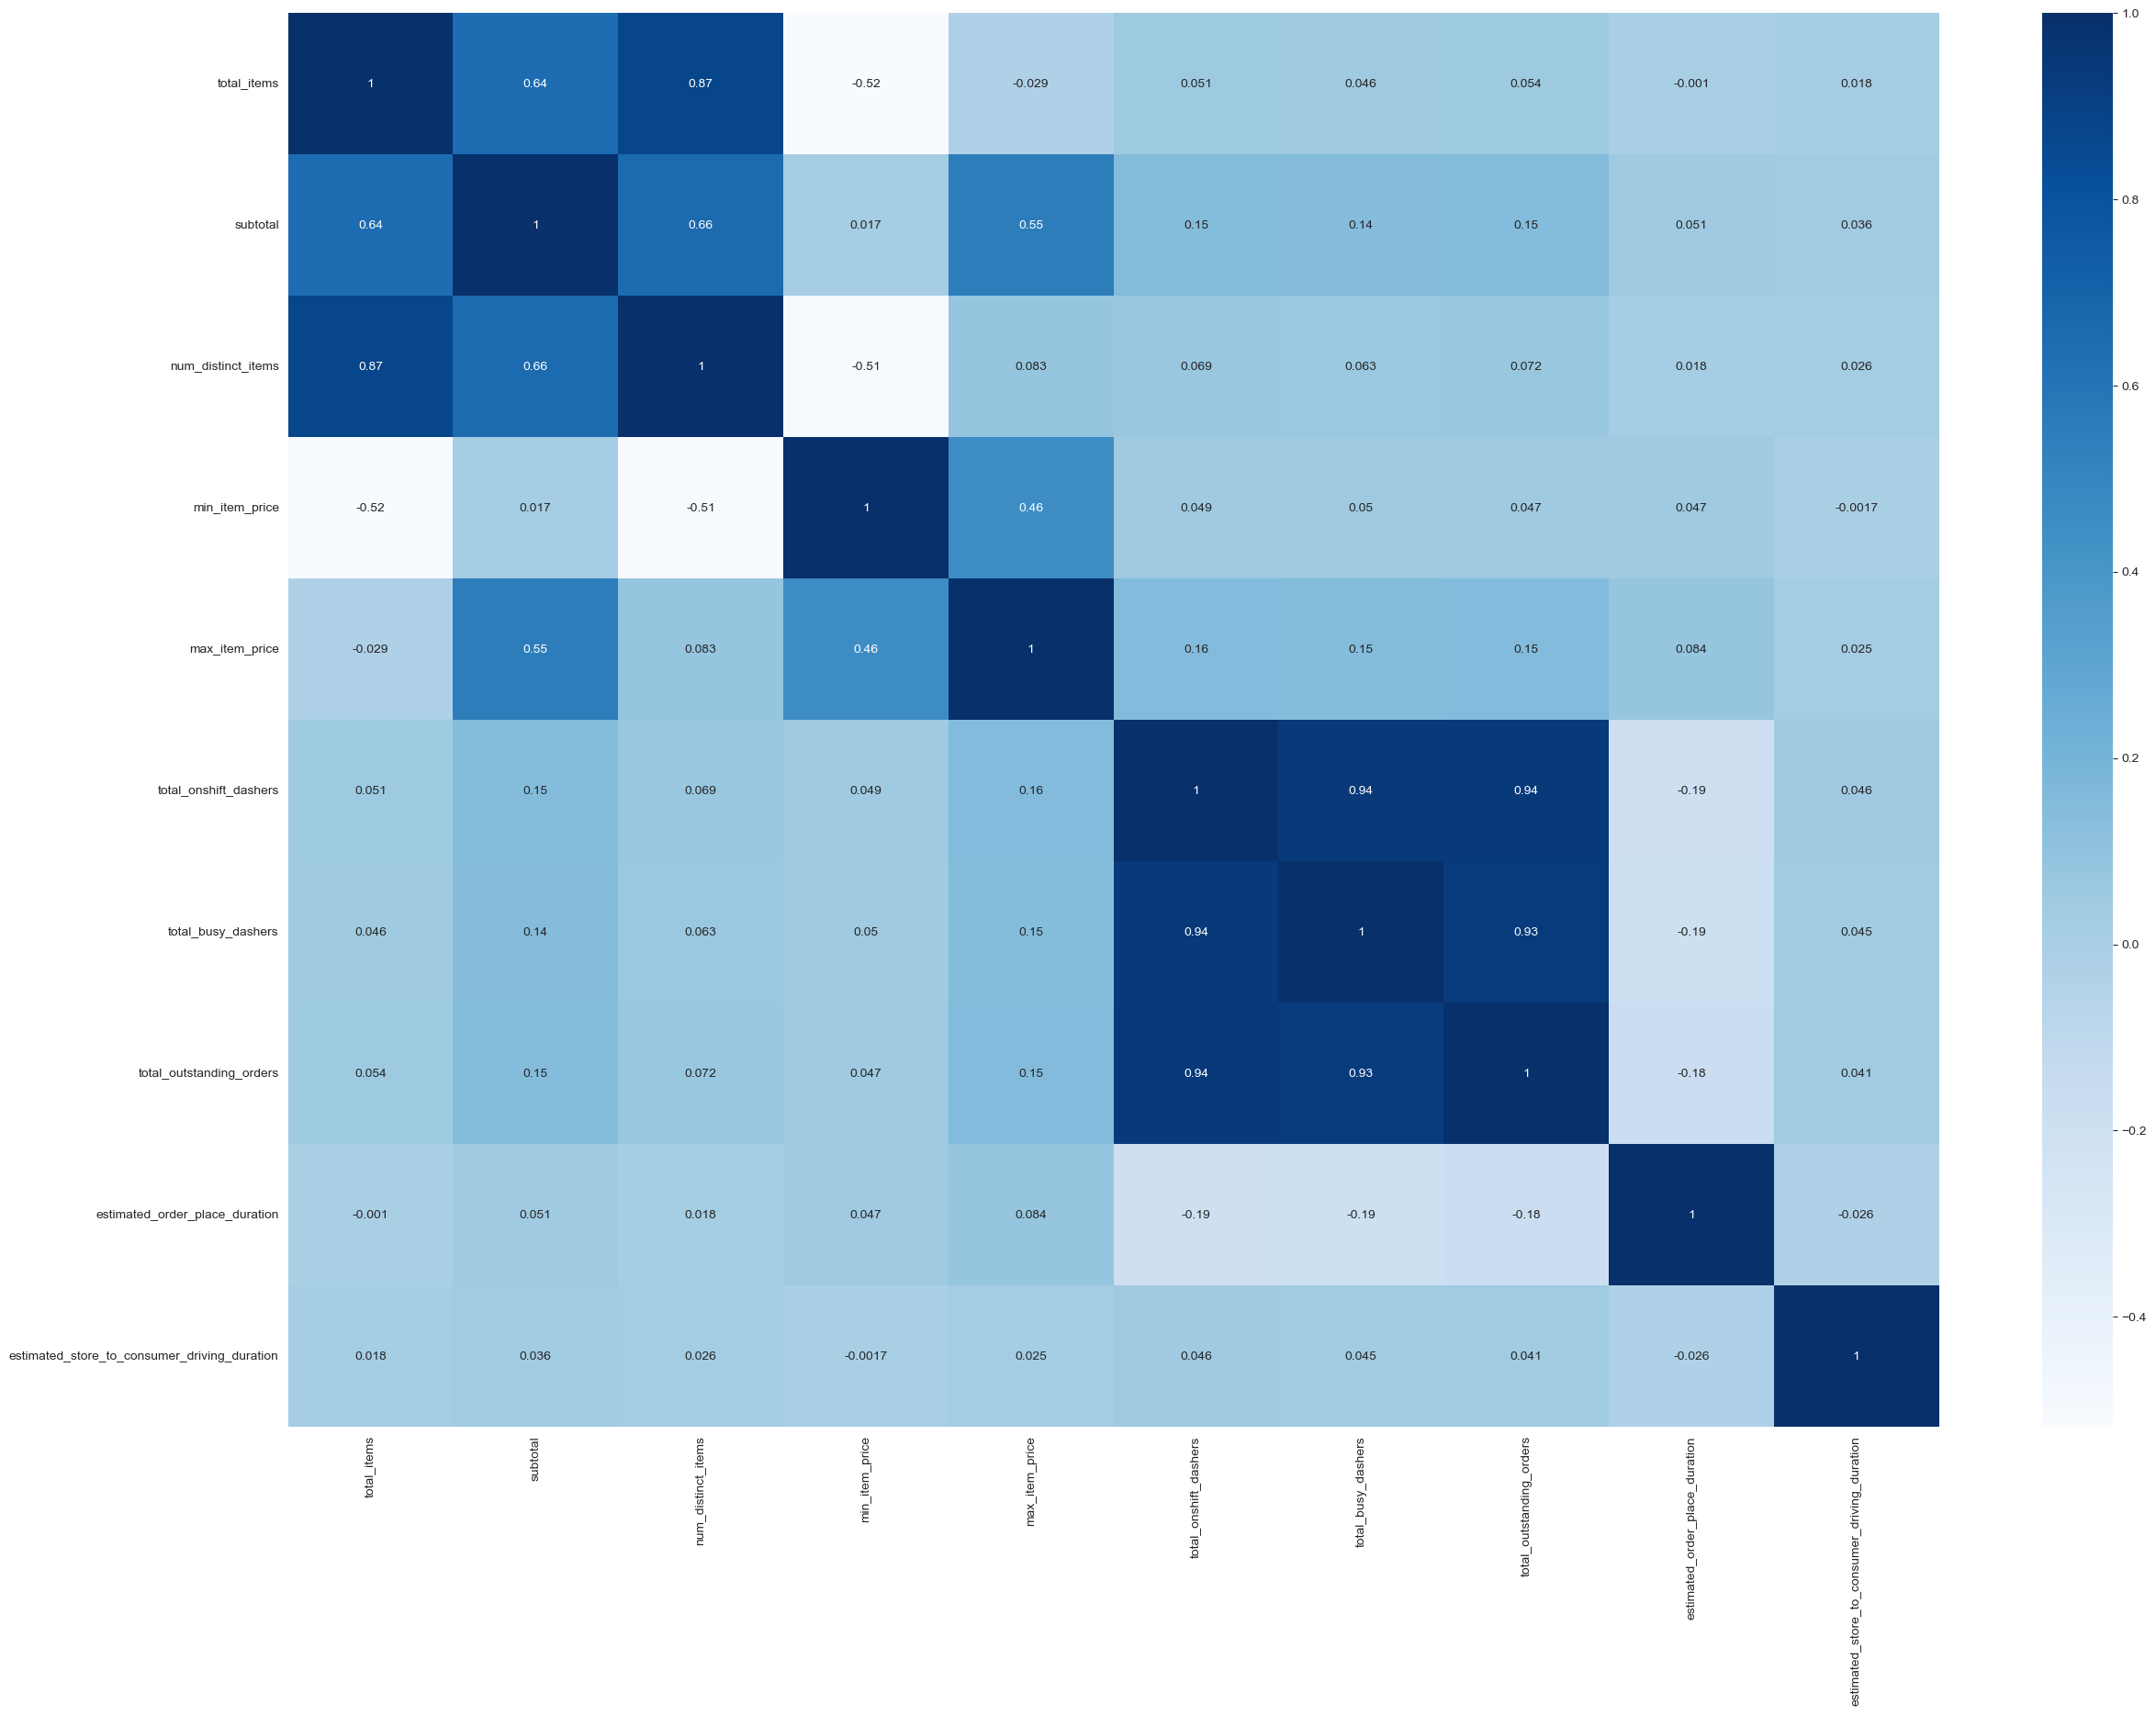

In [577]:
plt.figure(figsize=(29,20))
cor=df_cleaned.corr()
sns.heatmap(cor,annot=True,cmap="Blues")
plt.show()

In [25]:
df_cleaned.drop(columns=['num_distinct_items','total_outstanding_orders'],inplace=True)

C:\Users\Mansoor\AppData\Local\Temp\ipykernel_15496\1253273616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['num_distinct_items','total_outstanding_orders'],inplace=True)


# Feature Engineering

### Delivery time --> the required output variable

In [26]:
delivery_time=df_cleaned['actual_delivery_time']-df_cleaned['created_at']
df_cleaned['delivery_time']=delivery_time.dt.seconds

C:\Users\Mansoor\AppData\Local\Temp\ipykernel_15496\3624842718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['delivery_time']=delivery_time.dt.seconds


In [27]:
df_cleaned.head()

market_id          created_at actual_delivery_time store_id  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:27:16     1845   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:56:29     5477   
2       3.0 2015-01-22 20:39:28  2015-01-22 21:09:09     5477   
3       3.0 2015-02-03 21:21:45  2015-02-03 22:13:00     5477   
4       3.0 2015-02-15 02:40:36  2015-02-15 03:20:26     5477   

  store_primary_category order_protocol  total_items  subtotal  \
0               american            1.0            4      3441   
1                mexican            2.0            1      1900   
2               american            1.0            1      1900   
3               american            1.0            6      6900   
4               american            1.0            3      3900   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0             557            1239                   33.0                14.0   
1            1400            1400                    1.0                 2.0   
2            1900            1900                    1.0                 0.0   
3             600            1800                    1.0                 1.0   
4            1100            1600                    6.0                 6.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  delivery_time  
0                                         861.0           3779  
1                                         690.0           4024  
2                                         690.0           1781  
3                                         289.0           3075  
4                                         650.0           2390

In [28]:
df_cleaned['avg_prc_per_itm']=df_cleaned['subtotal']/df_cleaned['total_items']

C:\Users\Mansoor\AppData\Local\Temp\ipykernel_15496\1043905318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['avg_prc_per_itm']=df_cleaned['subtotal']/df_cleaned['total_items']


In [29]:
df_cleaned['dshr_utlztn']=df_cleaned['total_onshift_dashers']-df_cleaned['total_busy_dashers']

C:\Users\Mansoor\AppData\Local\Temp\ipykernel_15496\2373355352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dshr_utlztn']=df_cleaned['total_onshift_dashers']-df_cleaned['total_busy_dashers']


In [30]:
df_cleaned.head()

market_id          created_at actual_delivery_time store_id  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:27:16     1845   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:56:29     5477   
2       3.0 2015-01-22 20:39:28  2015-01-22 21:09:09     5477   
3       3.0 2015-02-03 21:21:45  2015-02-03 22:13:00     5477   
4       3.0 2015-02-15 02:40:36  2015-02-15 03:20:26     5477   

  store_primary_category order_protocol  total_items  subtotal  \
0               american            1.0            4      3441   
1                mexican            2.0            1      1900   
2               american            1.0            1      1900   
3               american            1.0            6      6900   
4               american            1.0            3      3900   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0             557            1239                   33.0                14.0   
1            1400            1400                    1.0                 2.0   
2            1900            1900                    1.0                 0.0   
3             600            1800                    1.0                 1.0   
4            1100            1600                    6.0                 6.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  delivery_time  \
0                                         861.0           3779   
1                                         690.0           4024   
2                                         690.0           1781   
3                                         289.0           3075   
4                                         650.0           2390   

   avg_prc_per_itm  dshr_utlztn  
0           860.25         19.0  
1          1900.00         -1.0  
2          1900.00          1.0  
3          1150.00          0.0  
4          1300.00          0.0

In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183889 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     183889 non-null  object        
 1   created_at                                    183889 non-null  datetime64[ns]
 2   actual_delivery_time                          183889 non-null  datetime64[ns]
 3   store_id                                      183889 non-null  object        
 4   store_primary_category                        183889 non-null  object        
 5   order_protocol                                183889 non-null  object        
 6   total_items                                   183889 non-null  int64         
 7   subtotal                                      183889 non-null  int64         
 8   min_item_price                                183889 n

# Standardization

#### There are some negative values in few columns we have to handle those before we standardize them

In [32]:
scaled_data=df_cleaned.copy()
scaled_data.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)
scaled_data['min_item_price'] = scaled_data['min_item_price'].abs()
scaled_data['total_onshift_dashers'] = scaled_data['total_onshift_dashers'].abs()
scaled_data['total_busy_dashers'] = scaled_data['total_busy_dashers'].abs()
scaled_data['dshr_utlztn'] = scaled_data['dshr_utlztn'].abs()

In [33]:
sc=StandardScaler()

In [34]:
nams=['total_items','subtotal','min_item_price','max_item_price','total_onshift_dashers',
      'total_busy_dashers','avg_prc_per_itm','estimated_order_place_duration' 
      ,'estimated_store_to_consumer_driving_duration'
      ,'delivery_time','dshr_utlztn']
features=scaled_data[nams]
scal=sc.fit(features.values)
features=sc.transform(features.values)
scaled_data[nams]=features

In [35]:
scaled_data.head()

market_id store_id store_primary_category order_protocol  total_items  \
0       1.0     1845               american            1.0     0.598084   
1       2.0     5477                mexican            2.0    -1.097192   
2       3.0     5477               american            1.0    -1.097192   
3       3.0     5477               american            1.0     1.728267   
4       3.0     5477               american            1.0     0.032992   

   subtotal  min_item_price  max_item_price  total_onshift_dashers  \
0  0.671902       -0.241391        0.307615              -0.309550   
1 -0.395268        1.719600        0.677587              -1.321574   
2 -0.395268        2.882703        1.826567              -1.321574   
3  3.067319       -0.141364        1.596771              -1.321574   
4  0.989767        1.021739        1.137179              -1.163445   

   total_busy_dashers  estimated_order_place_duration  \
0           -0.876052                        1.541972   
1           -1.282737                        1.541972   
2           -1.350517                        1.541972   
3           -1.316627                        1.541972   
4           -1.147175                        1.541972   

   estimated_store_to_consumer_driving_duration  delivery_time  \
0                                      1.456934       0.812120   
1                                      0.671210       1.020804   
2                                      0.671210      -0.889723   
3                                     -1.171334       0.212472   
4                                      0.487415      -0.370993   

   avg_prc_per_itm  dshr_utlztn  
0        -0.188204     1.415485  
1         2.282016    -0.565803  
2         2.282016    -0.565803  
3         0.500179    -0.675874  
4         0.856546    -0.675874

In [36]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183889 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     183889 non-null  object 
 1   store_id                                      183889 non-null  object 
 2   store_primary_category                        183889 non-null  object 
 3   order_protocol                                183889 non-null  object 
 4   total_items                                   183889 non-null  float64
 5   subtotal                                      183889 non-null  float64
 6   min_item_price                                183889 non-null  float64
 7   max_item_price                                183889 non-null  float64
 8   total_onshift_dashers                         183889 non-null  float64
 9   total_busy_dashers                            18

# Encoding categorical variables

In [37]:
cat_col=['market_id','store_id','store_primary_category','order_protocol']

In [38]:
scaled_data.head()

market_id store_id store_primary_category order_protocol  total_items  \
0       1.0     1845               american            1.0     0.598084   
1       2.0     5477                mexican            2.0    -1.097192   
2       3.0     5477               american            1.0    -1.097192   
3       3.0     5477               american            1.0     1.728267   
4       3.0     5477               american            1.0     0.032992   

   subtotal  min_item_price  max_item_price  total_onshift_dashers  \
0  0.671902       -0.241391        0.307615              -0.309550   
1 -0.395268        1.719600        0.677587              -1.321574   
2 -0.395268        2.882703        1.826567              -1.321574   
3  3.067319       -0.141364        1.596771              -1.321574   
4  0.989767        1.021739        1.137179              -1.163445   

   total_busy_dashers  estimated_order_place_duration  \
0           -0.876052                        1.541972   
1           -1.282737                        1.541972   
2           -1.350517                        1.541972   
3           -1.316627                        1.541972   
4           -1.147175                        1.541972   

   estimated_store_to_consumer_driving_duration  delivery_time  \
0                                      1.456934       0.812120   
1                                      0.671210       1.020804   
2                                      0.671210      -0.889723   
3                                     -1.171334       0.212472   
4                                      0.487415      -0.370993   

   avg_prc_per_itm  dshr_utlztn  
0        -0.188204     1.415485  
1         2.282016    -0.565803  
2         2.282016    -0.565803  
3         0.500179    -0.675874  
4         0.856546    -0.675874

In [39]:
sc_dta=scaled_data.drop(columns=['market_id','store_id','store_primary_category','order_protocol'])

In [40]:
sc_dummy=pd.get_dummies(scaled_data[['market_id','store_id','store_primary_category','order_protocol']])

In [41]:
dfs = [sc_dta,sc_dummy]
sc_du_df= pd.concat(dfs,axis=1)

In [42]:
sc_du_df.head()

total_items  subtotal  min_item_price  max_item_price  \
0     0.598084  0.671902       -0.241391        0.307615   
1    -1.097192 -0.395268        1.719600        0.677587   
2    -1.097192 -0.395268        2.882703        1.826567   
3     1.728267  3.067319       -0.141364        1.596771   
4     0.032992  0.989767        1.021739        1.137179   

   total_onshift_dashers  total_busy_dashers  estimated_order_place_duration  \
0              -0.309550           -0.876052                        1.541972   
1              -1.321574           -1.282737                        1.541972   
2              -1.321574           -1.350517                        1.541972   
3              -1.321574           -1.316627                        1.541972   
4              -1.163445           -1.147175                        1.541972   

   estimated_store_to_consumer_driving_duration  delivery_time  \
0                                      1.456934       0.812120   
1                                      0.671210       1.020804   
2                                      0.671210      -0.889723   
3                                     -1.171334       0.212472   
4                                      0.487415      -0.370993   

   avg_prc_per_itm  ...  store_primary_category_vegetarian  \
0        -0.188204  ...                                  0   
1         2.282016  ...                                  0   
2         2.282016  ...                                  0   
3         0.500179  ...                                  0   
4         0.856546  ...                                  0   

   store_primary_category_vietnamese  order_protocol_1.0  order_protocol_2.0  \
0                                  0                   1                   0   
1                                  0                   0                   1   
2                                  0                   1                   0   
3                                  0                   1                   0   
4                                  0                   1                   0   

   order_protocol_3.0  order_protocol_4.0  order_protocol_5.0  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   order_protocol_6.0  order_protocol_7.0  order_protocol_nan  
0                   0                   0                   0  
1                   0                   0                   0  
2                   0                   0                   0  
3                   0                   0                   0  
4                   0                   0                   0  

[5 rows x 6770 columns]

In [43]:
sc_du_df.drop(columns='delivery_time')

total_items  subtotal  min_item_price  max_item_price  \
0          0.598084  0.671902       -0.241391        0.307615   
1         -1.097192 -0.395268        1.719600        0.677587   
2         -1.097192 -0.395268        2.882703        1.826567   
3          1.728267  3.067319       -0.141364        1.596771   
4          0.032992  0.989767        1.021739        1.137179   
...             ...       ...             ...             ...   
197423     0.032992 -0.749144       -0.734547       -1.048181   
197424     1.728267  0.373427       -0.594975       -0.643740   
197425     1.163175 -0.439589       -0.839226       -1.622671   
197426    -1.097192 -0.897343       -0.292568       -1.310149   
197427     0.598084  0.092957       -0.548450       -0.816087   

        total_onshift_dashers  total_busy_dashers  \
0                   -0.309550           -0.876052   
1                   -1.321574           -1.282737   
2                   -1.321574           -1.350517   
3                   -1.321574           -1.316627   
4                   -1.163445           -1.147175   
...                       ...                 ...   
197423              -0.815562           -0.774380   
197424              -0.973691           -0.977723   
197425              -0.119796            0.038990   
197426              -1.131819           -1.113284   
197427              -0.720685           -0.672709   

        estimated_order_place_duration  \
0                             1.541972   
1                             1.541972   
2                             1.541972   
3                             1.541972   
4                             1.541972   
...                                ...   
197423                       -0.648141   
197424                       -0.648141   
197425                       -0.648141   
197426                        1.541972   
197427                        1.541972   

        estimated_store_to_consumer_driving_duration  avg_prc_per_itm  \
0                                           1.456934        -0.188204   
1                                           0.671210         2.282016   
2                                           0.671210         2.282016   
3                                          -1.171334         0.500179   
4                                           0.487415         0.856546   
...                                              ...              ...   
197423                                     -0.978349        -1.131984   
197424                                      1.705057        -1.040120   
197425                                      1.153672        -1.359584   
197426                                     -0.734821         0.559574   
197427                                     -1.883540        -0.684743   

        dshr_utlztn  ...  store_primary_category_vegetarian  \
0          1.415485  ...                                  0   
1         -0.565803  ...                                  0   
2         -0.565803  ...                                  0   
3         -0.675874  ...                                  0   
4         -0.675874  ...                                  0   
...             ...  ...                                ...   
197423    -0.675874  ...                                  0   
197424    -0.565803  ...                                  0   
197425    -0.455731  ...                                  0   
197426    -0.675874  ...                                  0   
197427    -0.675874  ...                                  0   

        store_primary_category_vietnamese  order_protocol_1.0  \
0                                       0                   1   
1                                       0                   0   
2                                       0                   1   
3                                       0                   1   
4                                       0                   1   
...                                   ...                 ...

In [44]:
sc_du_df['delivery_time']

0         0.812120
1         1.020804
2        -0.889723
3         0.212472
4        -0.370993
            ...   
197423    0.921147
197424    0.474818
197425    0.155403
197426    0.921147
197427   -0.508980
Name: delivery_time, Length: 183889, dtype: float64

In [45]:
x=sc_du_df.drop(columns='delivery_time')
y=sc_du_df['delivery_time']

## Dimensionality Reduction

Using PCA because we have 6769 features  

In [46]:
pca=PCA(n_components=12)
principalcomponents=pca.fit_transform(x)
pca_df=pd.DataFrame(data=principalcomponents,columns=['pc1' , 'pc2', 'pc3', 'pc4','pc5'
                                                      ,'pc6','pc7','pc8','pc9','pc10','pc11','pc12'
                                                     ])

In [47]:
pca_df.head()

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -0.153655 -0.184984  1.427538  1.451633  1.625093  1.509897  0.054816   
1  0.938716 -3.567183 -0.108904  0.374767  0.882979  0.253882 -0.438968   
2  1.777311 -4.542833  0.269663  0.654382  0.895240  0.345915 -0.280169   
3  0.128170 -1.457055  4.460911  0.492331 -1.117592  0.324311  0.018573   
4  0.395231 -2.529481  1.818577  0.691815  0.658400  0.123794 -0.107701   

        pc8       pc9      pc10      pc11      pc12  
0  0.049945 -0.169925  0.838656 -0.251329 -0.140495  
1  0.617763  0.434831 -0.668995 -0.191023  0.452441  
2 -0.030926  0.084730 -0.535944 -0.158006 -0.866423  
3  0.124625  0.052622 -0.524215  0.340800  0.093494  
4  0.009887  0.033350 -0.465319  0.158506 -0.262736

In [48]:
pca.explained_variance_ratio_

array([0.20730079, 0.1735109 , 0.1326281 , 0.08202123, 0.07353427,
       0.05032857, 0.02610454, 0.01952766, 0.01796511, 0.01278731,
       0.01141984, 0.0103981 ])

In [49]:
np.cumsum(pca.explained_variance_ratio_*100)

array([20.73007898, 38.08116902, 51.34397951, 59.54610255, 66.89952953,
       71.93238643, 74.54284089, 76.49560711, 78.29211828, 79.57084941,
       80.7128335 , 81.75264362])

In [50]:
print(sum(pca.explained_variance_ratio_*100))

81.75264361611362


In [51]:
x_train,x_test,y_train,y_test=train_test_split(pca_df,y,test_size=0.3,random_state=123)

In [52]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'XGBoost Regression': XGBRegressor()
}


In [53]:

# Initialize metrics
metrics = ['MSE', 'MAE', 'R2', 'Adjusted R2', 'RMSE']

# Initialize DataFrame to store results
results_df = pd.DataFrame(index=metrics, columns=models.keys())

In [55]:



# Fit models, predict on test data, and evaluate
for model_name, model in models.items():
    print(f'fitting {model_name}')
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    # Store results in DataFrame
    results_df.at['MSE', model_name] = mse
    results_df.at['MAE', model_name] = mae
    results_df.at['R2', model_name] = r2
    results_df.at['Adjusted R2', model_name] = adjusted_r2
    results_df.at['RMSE', model_name] = rmse
    print(f'done with {model_name}')

fitting Linear Regression
done with Linear Regression
fitting Ridge Regression
done with Ridge Regression
fitting Lasso Regression
done with Lasso Regression
fitting Decision Tree Regression
done with Decision Tree Regression
fitting XGBoost Regression
done with XGBoost Regression


In [56]:
results_df

Linear Regression Ridge Regression Lasso Regression  \
MSE                  0.847993         0.847993          0.96201   
MAE                  0.635279         0.635279         0.690309   
R2                   0.118487         0.118487        -0.000038   
Adjusted R2          0.118295         0.118295        -0.000255   
RMSE                 0.920865         0.920865         0.980821   

            Decision Tree Regression XGBoost Regression  
MSE                         1.727859            0.85004  
MAE                         0.901522           0.630719  
R2                          -0.79616           0.116359  
Adjusted R2                -0.796551           0.116167  
RMSE                         1.31448           0.921976